# <a id='toc1_'></a>[Modeling](#toc0_)

"""
Created on Fri Jun 30 14:37:40 2023

@author: Nima
"""

**Table of contents**<a id='toc0_'></a>    
- [Modeling](#toc1_)    
- [1. Introduction](#toc2_)    
  - [1.1. Key Questions](#toc2_1_)    
  - [1.2. Assumptions and Methods](#toc2_2_)    
  - [1.3. Setup and Data Collection](#toc2_3_)    
- [2. Modeling Training](#toc3_)    
      - [Almost in every model we have sections such as:](#toc3_1_1_1_)    
      - [After Hyperparameter Tuning:](#toc3_1_1_2_)    
  - [2.1. Train, Test Split](#toc3_2_)    
  - [2.2. Models](#toc3_3_)    
    - [2.2.1 Linear Regression](#toc3_3_1_)    
      - [2.2.1.1 Before Hyperparameter](#toc3_3_1_1_)    
      - [2.2.1.2 After Hyperparameter](#toc3_3_1_2_)    
    - [2.2.2 Decision tree](#toc3_3_2_)    
      - [2.2.2.1 Before Hyperparameter](#toc3_3_2_1_)    
      - [2.2.2.2 After Hyperparameter](#toc3_3_2_2_)    
    - [2.2.3 Random Forest](#toc3_3_3_)    
      - [2.2.3.1 Before Hyperparameter](#toc3_3_3_1_)    
      - [2.2.3.2 After Hyperparameter](#toc3_3_3_2_)    
    - [2.2.4 KNN Neighbour](#toc3_3_4_)    
      - [2.2.4.1 Before Hyperparameter](#toc3_3_4_1_)    
      - [2.2.4.2 After Hyperparameter](#toc3_3_4_2_)    
    - [2.2.4 XGBoost](#toc3_3_5_)    
      - [2.2.4.1 Before Hyperparameter](#toc3_3_5_1_)    
      - [2.2.4.2 After Hyperparameter](#toc3_3_5_2_)    
- [4. Model Comparison and Key Findings](#toc4_)    
        - [1) Model Comparison](#toc4_1_1_1_1_)    
        - [2) Use of hyperparameters](#toc4_1_1_1_2_)    
        - [3) Accuracy comment](#toc4_1_1_1_3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc2_'></a>[1. Introduction](#toc0_)



## <a id='toc2_1_'></a>[1.1. Key Questions](#toc0_)

What is the best machine learning technic and with what parameters to predict the most accurately the price of an Airbnb?

## <a id='toc2_2_'></a>[1.2. Assumptions and Methods](#toc0_)

Please uncomment line of code in hyperparametization of Random forest and XGBoost if necessary. The result of GridSearch were saved in a variables to save on execution time.


## <a id='toc2_3_'></a>[1.3. Setup and Data Collection](#toc0_)



In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, GridSearchCV
from xgboost import XGBRegressor
import xgboost as xgb
import os

In [68]:
# Reading the configuration file
exec(open('executables/0_Config.py').read())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5975 entries, 0 to 5974
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            5975 non-null   int64  
 1   listing_url                                   5975 non-null   object 
 2   scrape_id                                     5975 non-null   int64  
 3   last_scraped                                  5975 non-null   object 
 4   source                                        5975 non-null   object 
 5   name                                          5975 non-null   object 
 6   description                                   5950 non-null   object 
 7   neighborhood_overview                         3996 non-null   object 
 8   picture_url                                   5975 non-null   object 
 9   host_id                                       5975 non-null   i

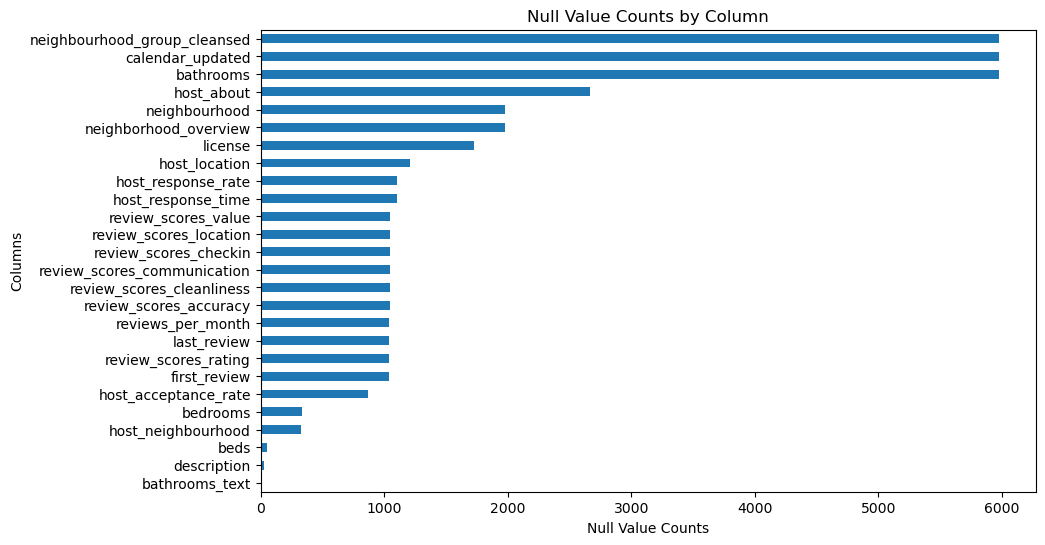

<string>:298: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:299: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:332: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:333: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

Replacing host_response_time with unknown when null
host_acceptance_rate     819
review_scores_rating    1035
host_response_rate      1055
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5975 entries, 0 to 5974
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         5975 non-null   int64         
 1   name                       5975 non-null   int32         
 2   description                5975 non-null   int32         
 3   neighborhood_overview      5975 non-null   int32         
 4   host_id                    5975 non-null   int64         
 5   host_since                 5975 non-null   datetime64[ns]
 6   host_about                 5975 non-null   int32         
 7   host_response_time         5975 non-null   object        
 8   host_response_rate         4920 non-null   object        
 9   host_acceptance_rate       5156 non-null   

<string>:522: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
<string>:539: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


1589
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5975 entries, 0 to 5974
Data columns (total 71 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   id                                  5975 non-null   int64         
 1   name                                5975 non-null   int32         
 2   description                         5975 non-null   int32         
 3   neighborhood_overview               5975 non-null   int32         
 4   host_id                             5975 non-null   int64         
 5   host_since                          5975 non-null   datetime64[ns]
 6   host_about                          5975 non-null   int32         
 7   host_response_time                  5975 non-null   object        
 8   host_response_rate                  4868 non-null   float64       
 9   host_acceptance_rate                5110 non-null   float64       
 10  host_is_superhost  

<string>:586: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


File execution completed.


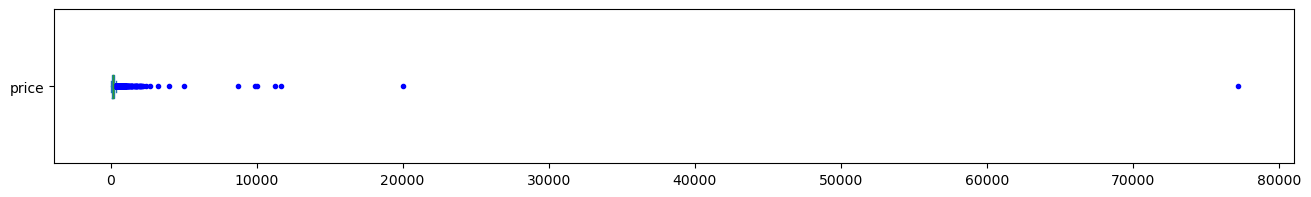

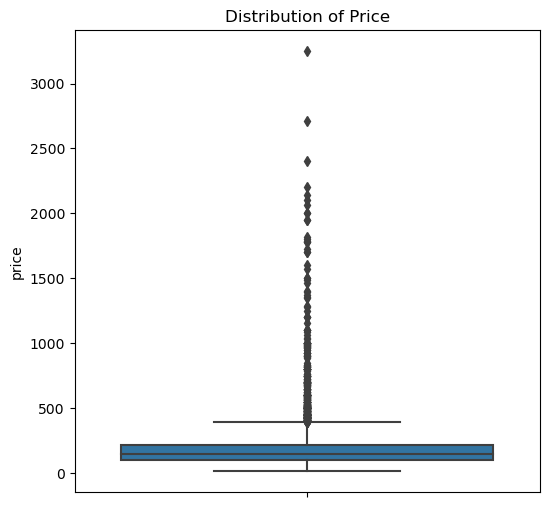

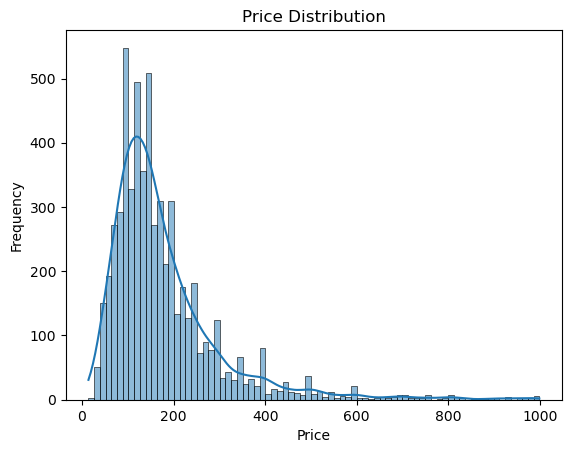

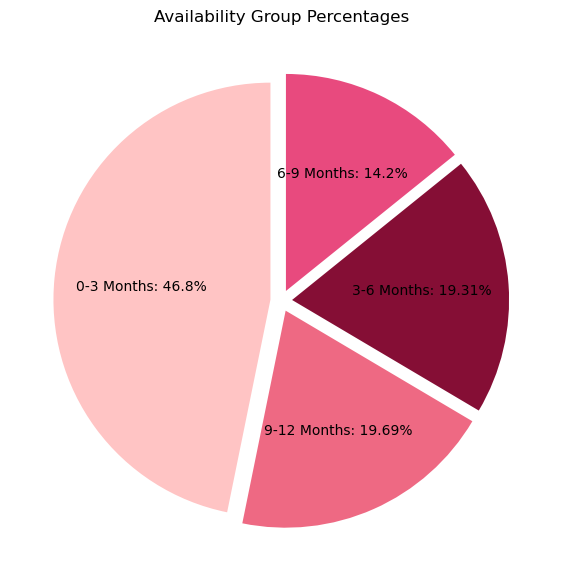

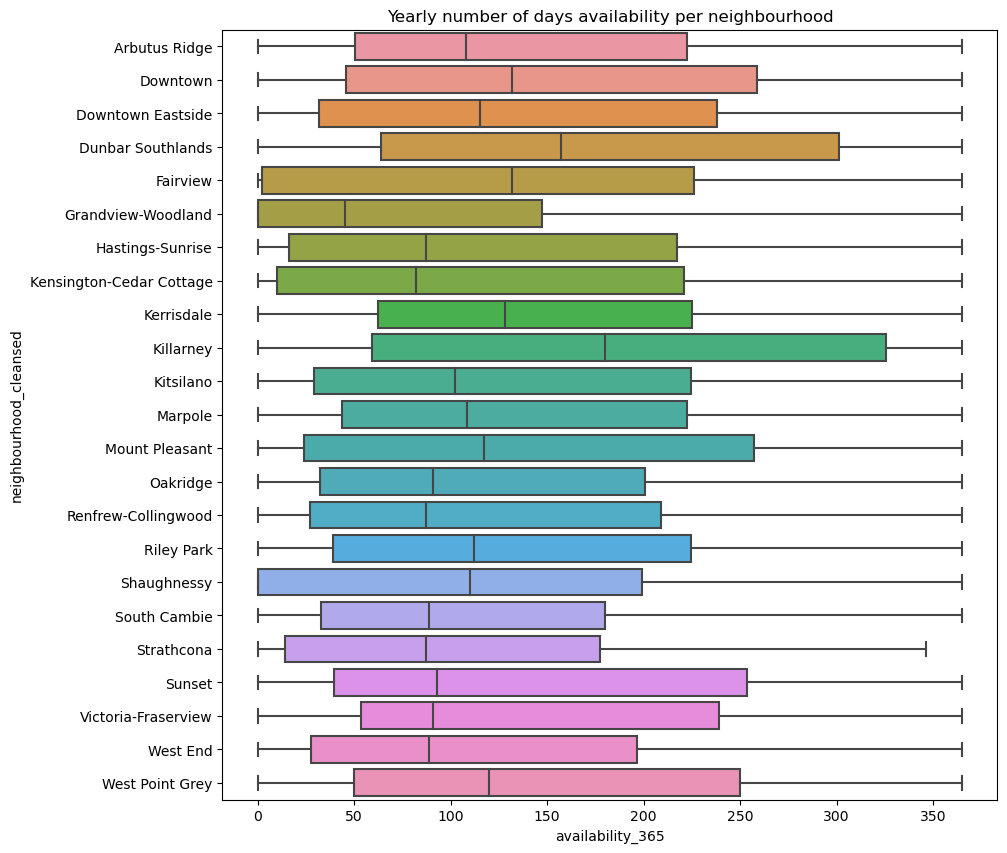

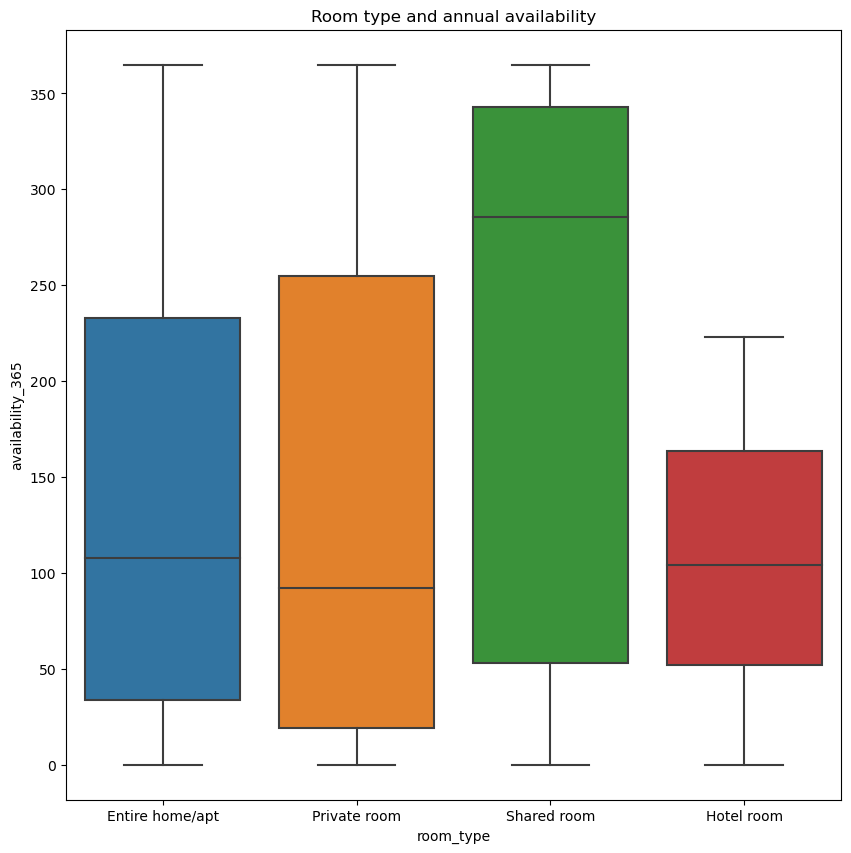

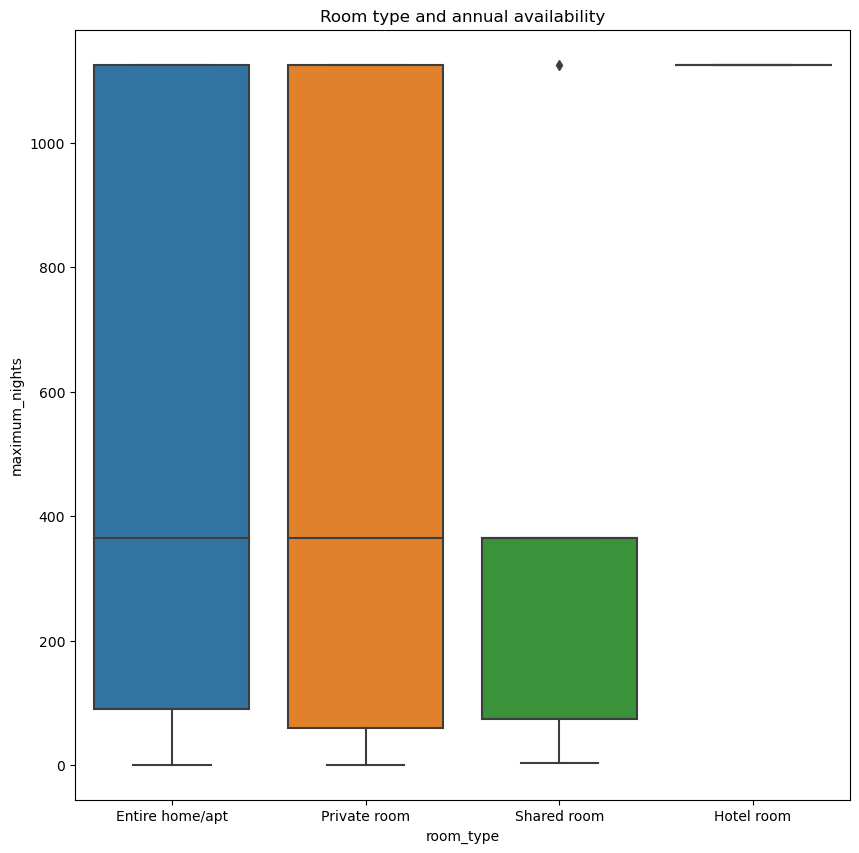

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5937 entries, 0 to 5974
Data columns (total 76 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   id                                  5937 non-null   int64         
 1   name                                5937 non-null   int32         
 2   description                         5937 non-null   int32         
 3   neighborhood_overview               5937 non-null   int32         
 4   host_id                             5937 non-null   int64         
 5   host_since                          5937 non-null   datetime64[ns]
 6   host_about                          5937 non-null   int32         
 7   host_response_time                  5937 non-null   object        
 8   host_response_rate                  4836 non-null   float64       
 9   host_acceptance_rate                5077 non-null   float64       
 10  host_is_superhost       

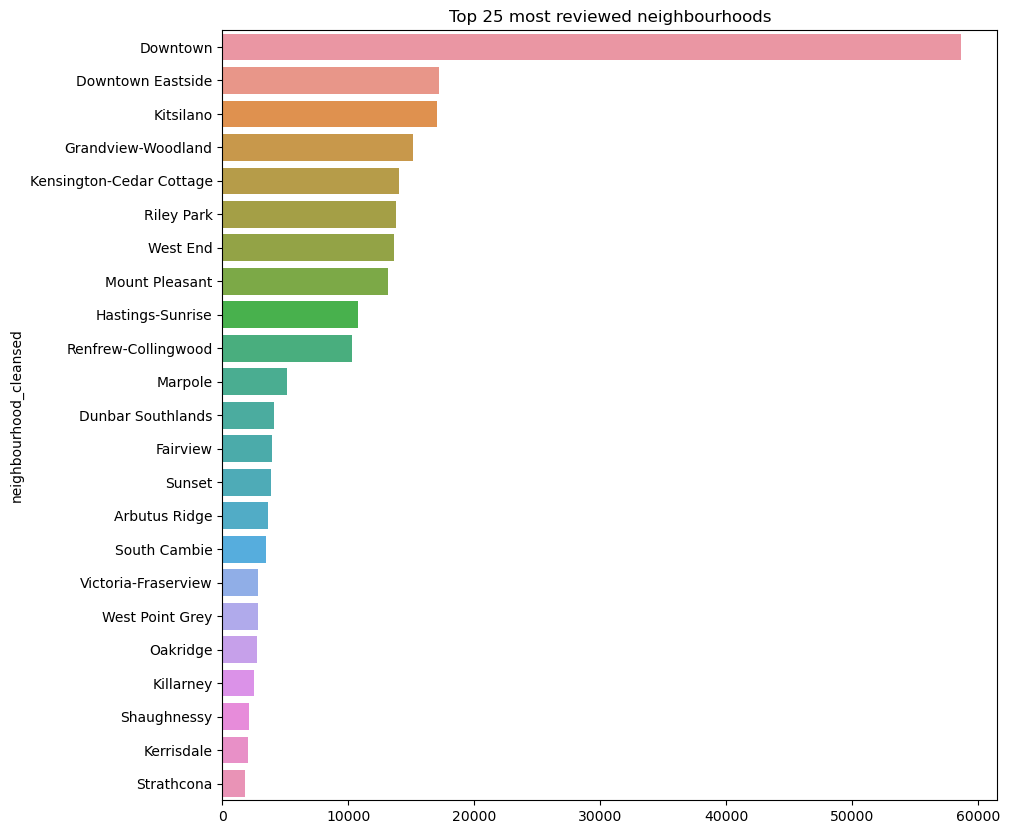

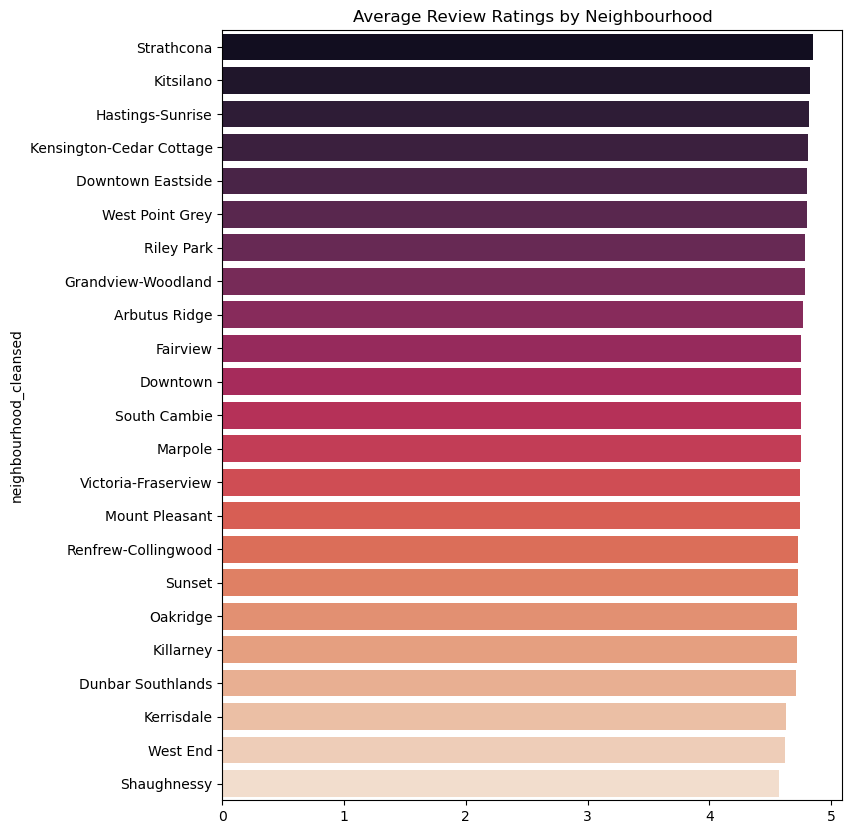

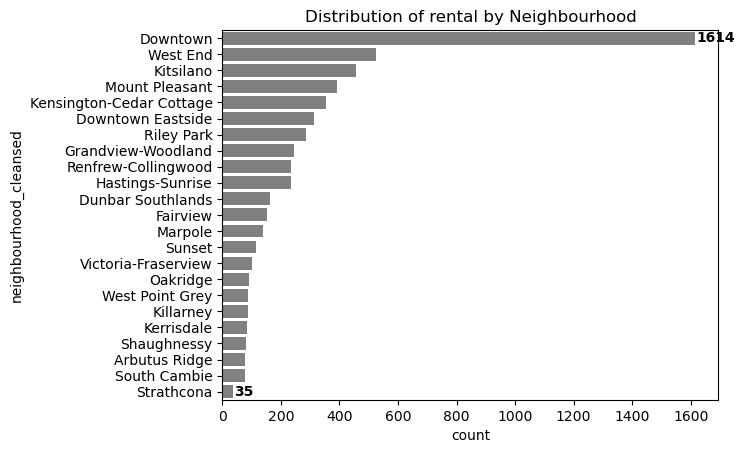

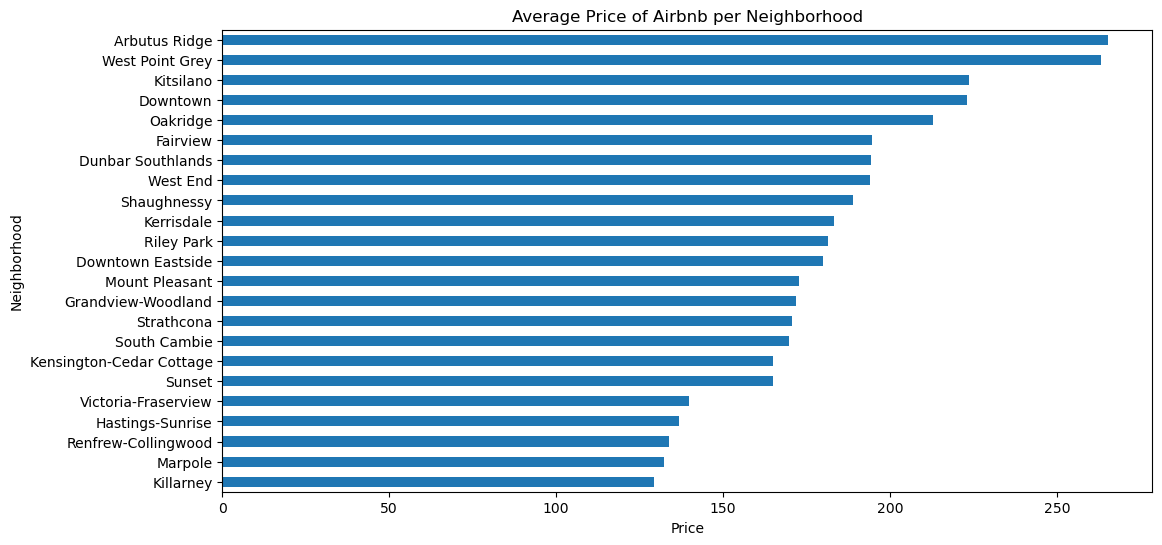

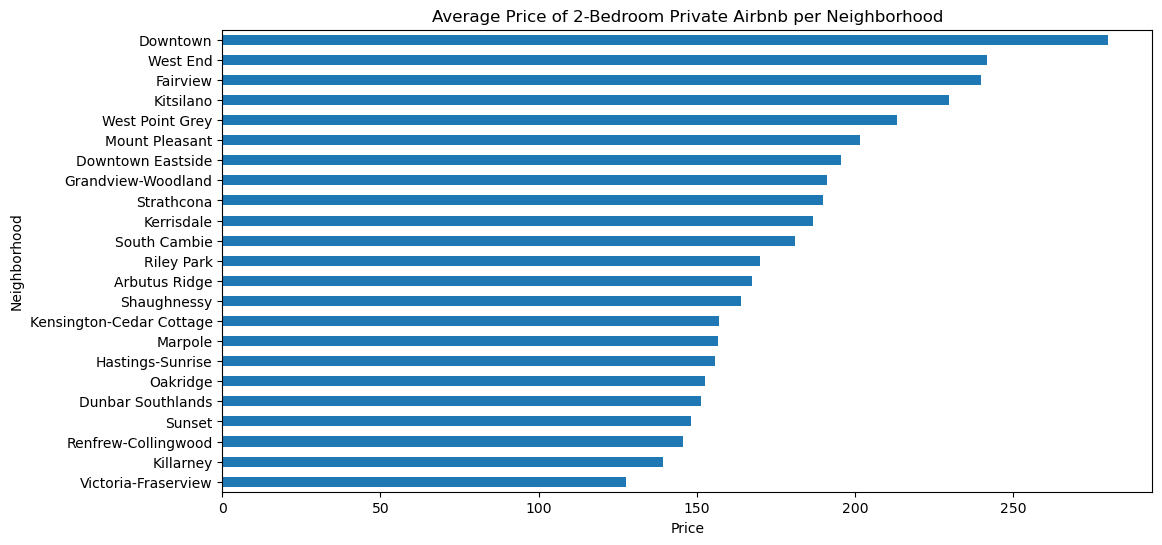

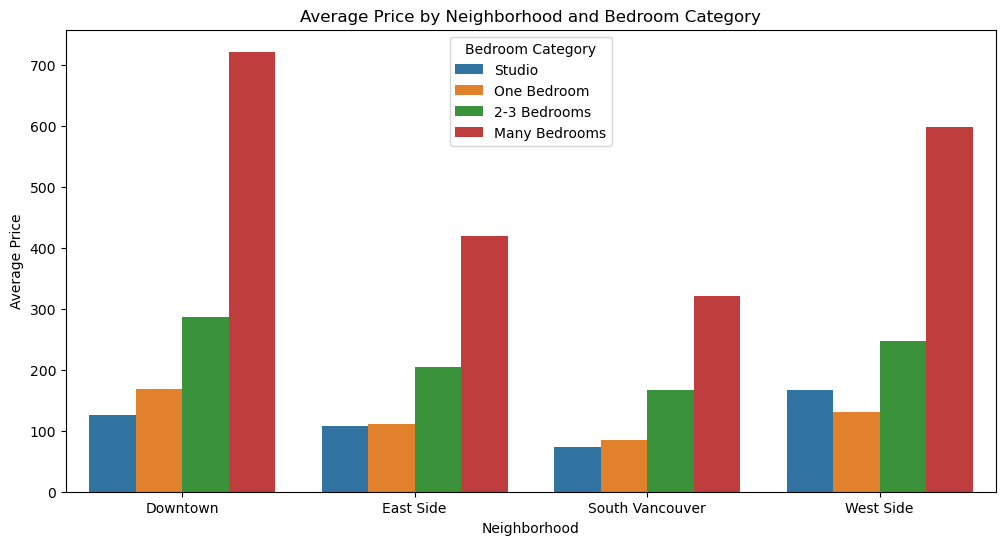

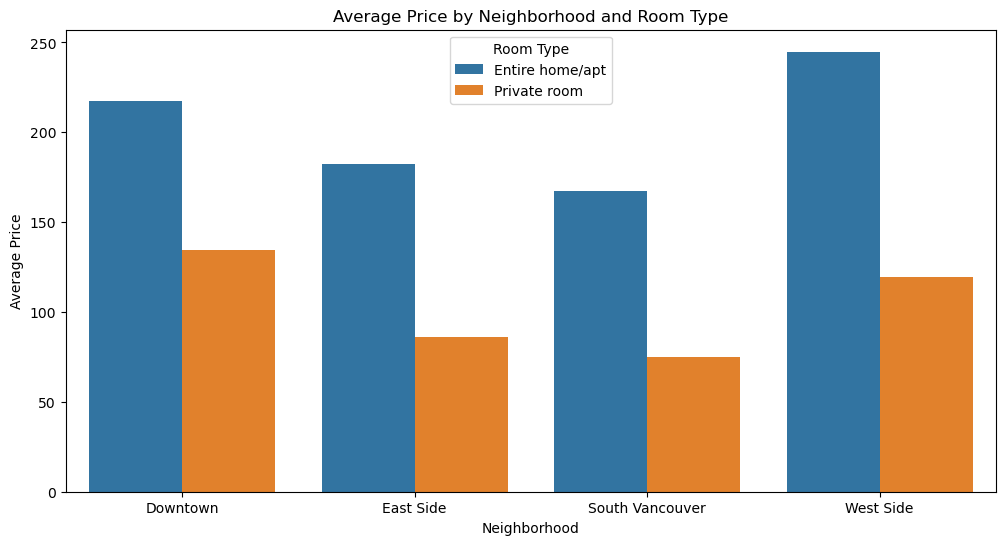

<string>:502: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


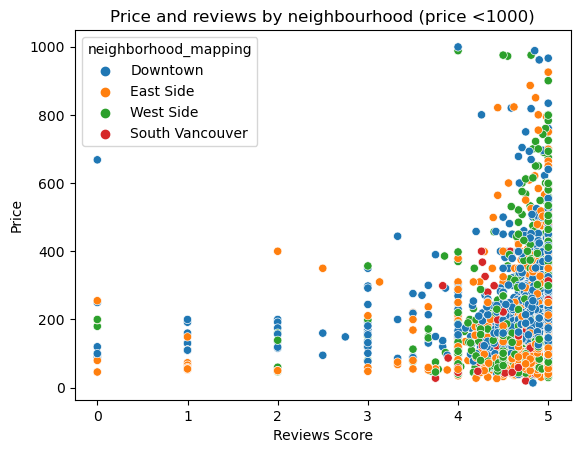

<string>:537: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



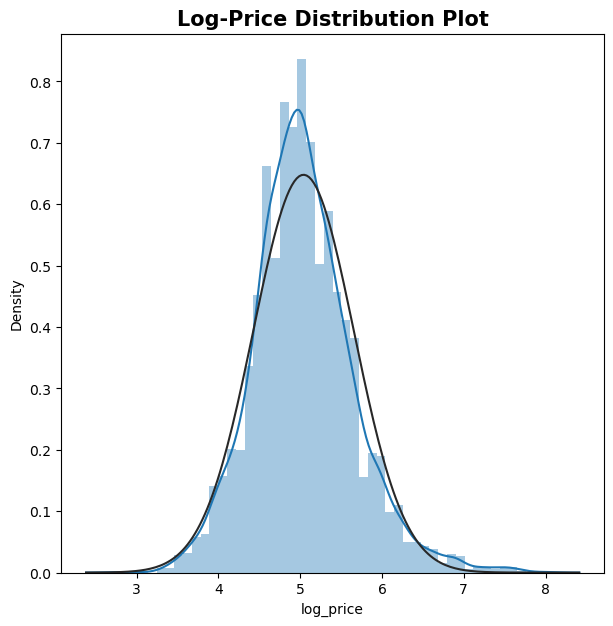

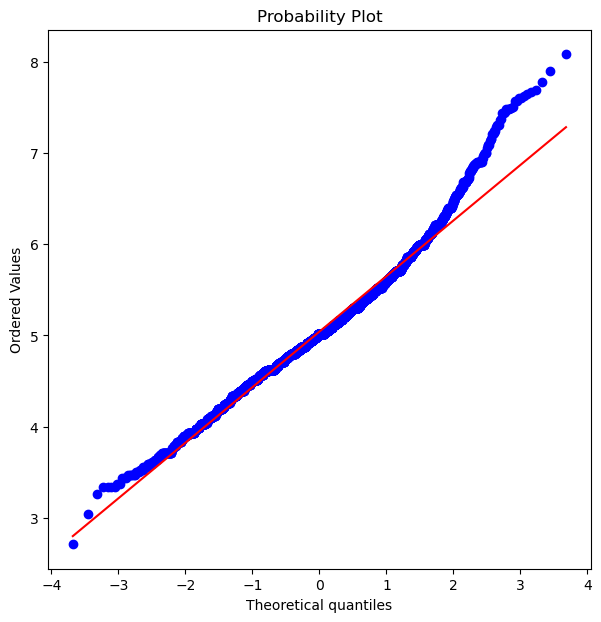

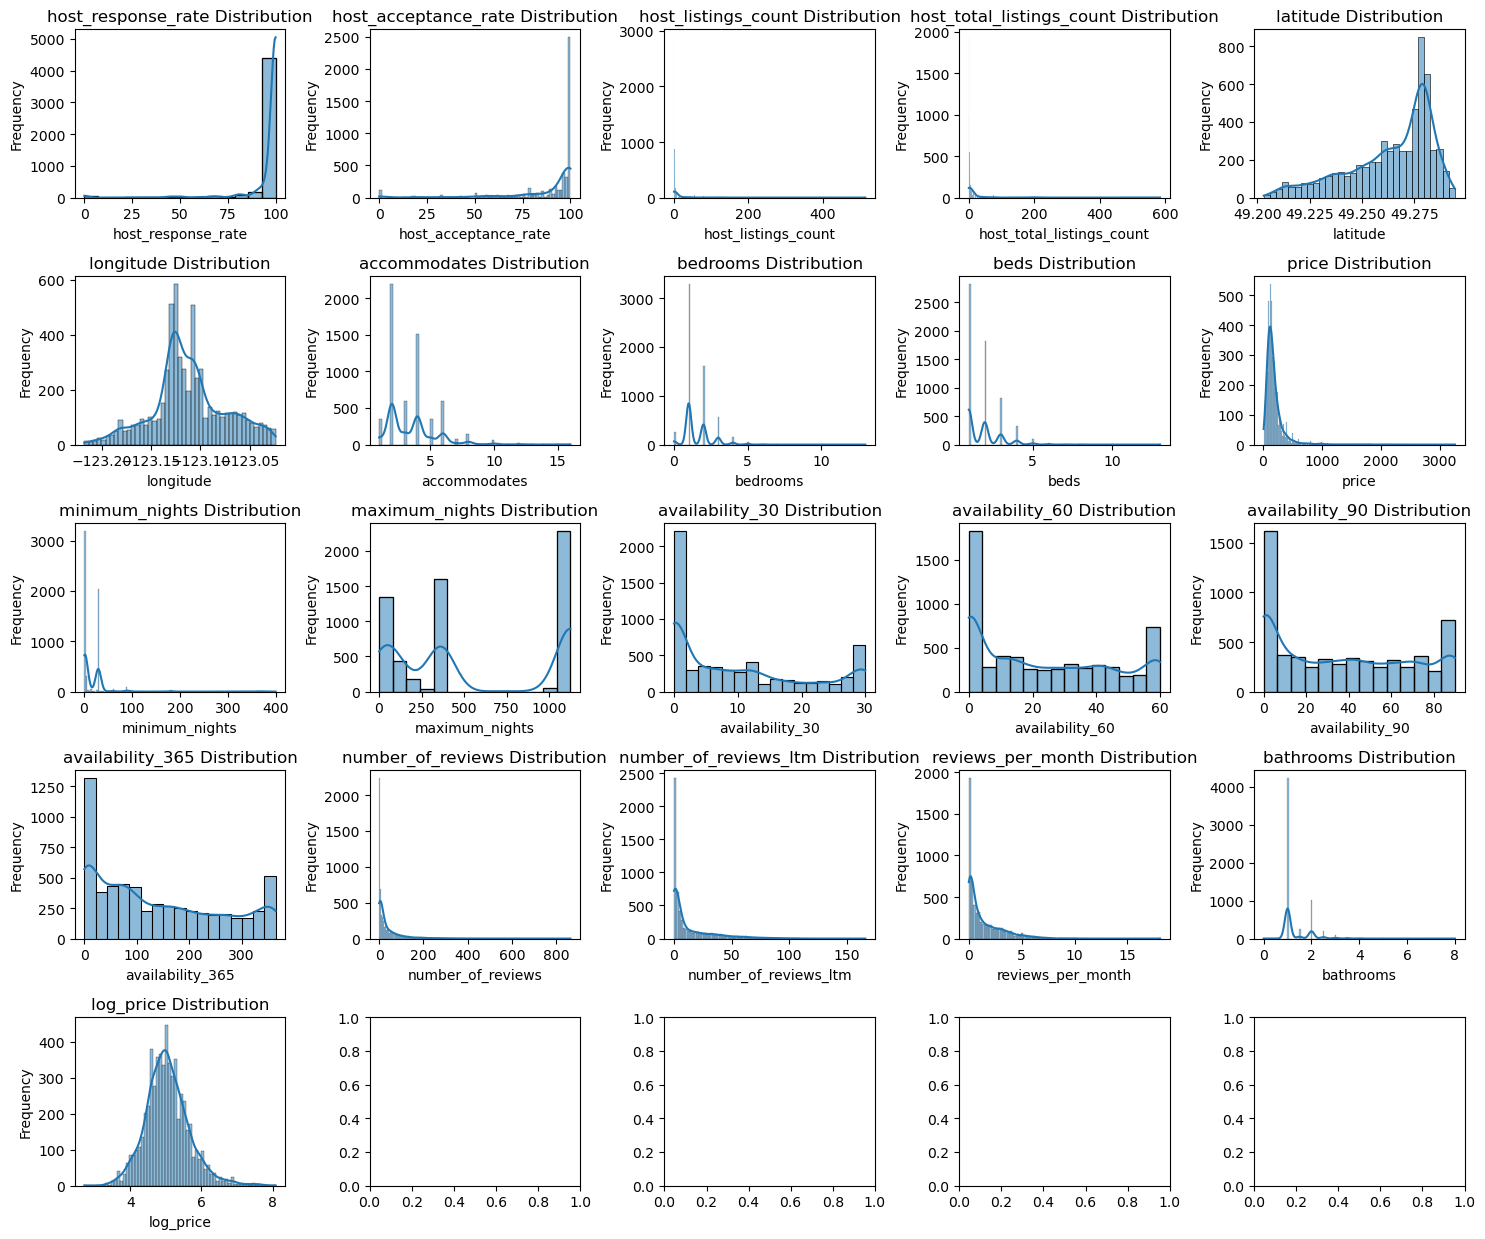

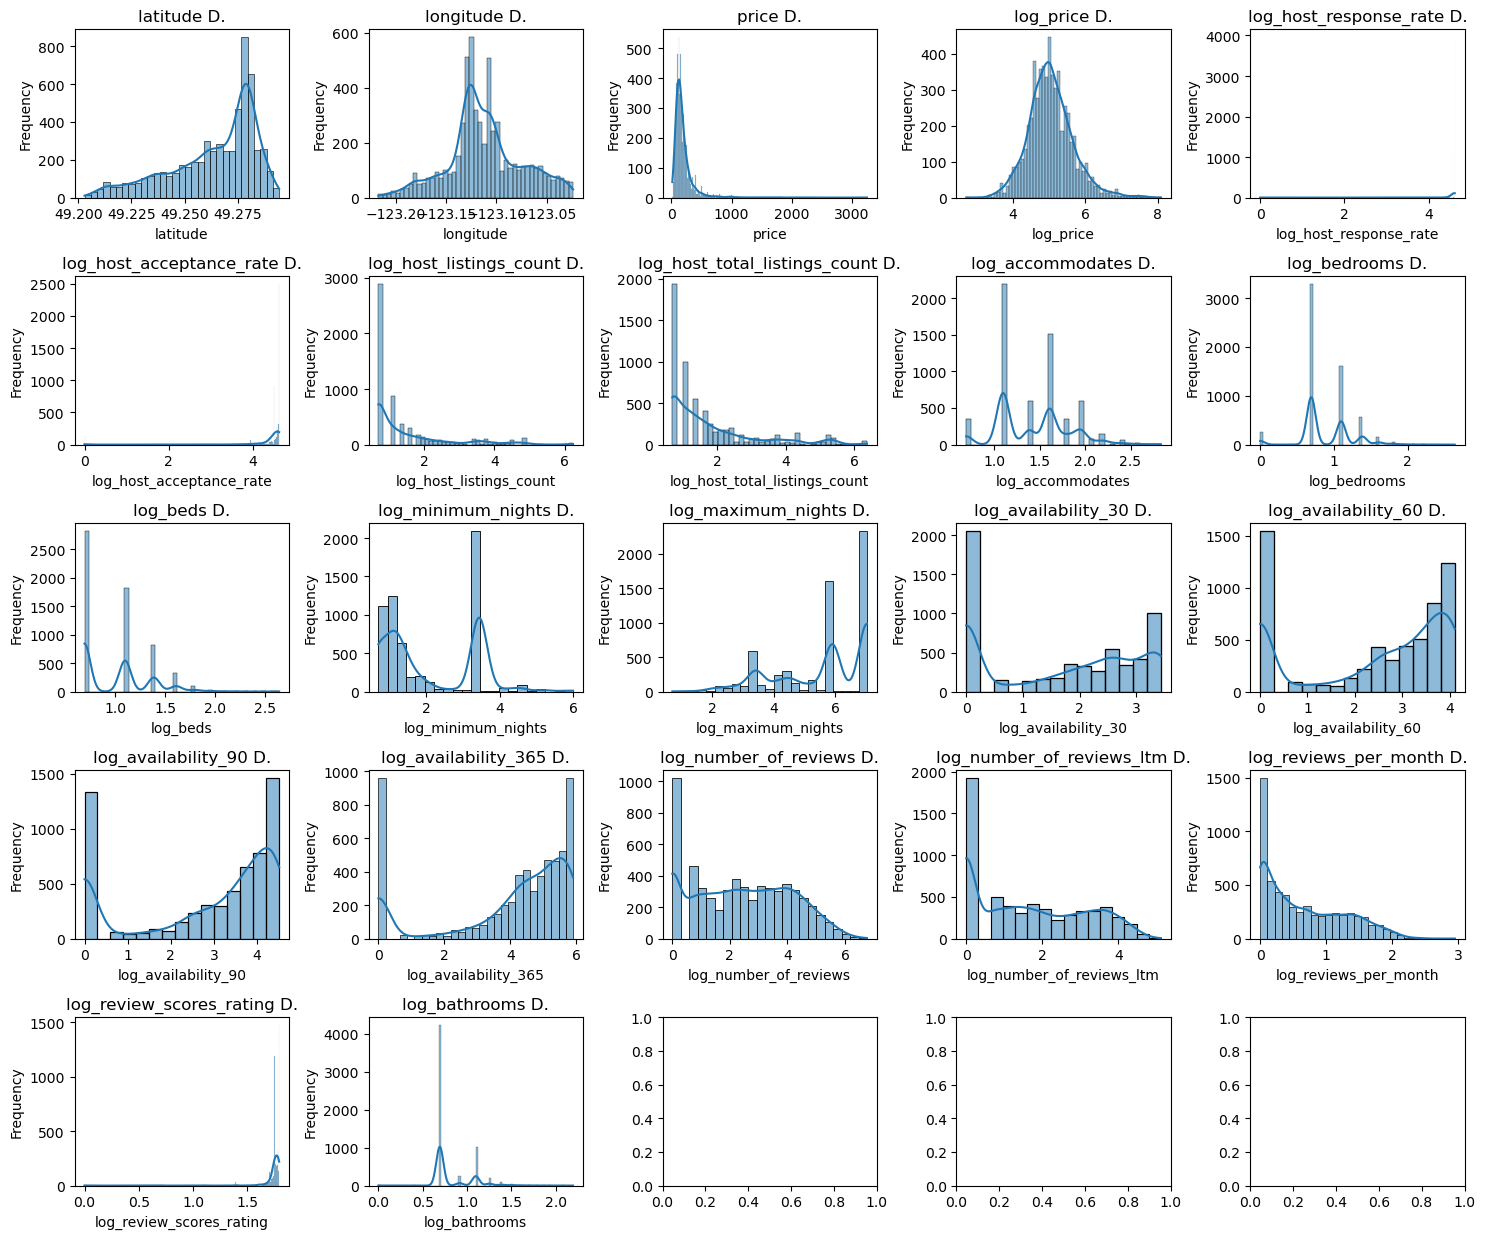

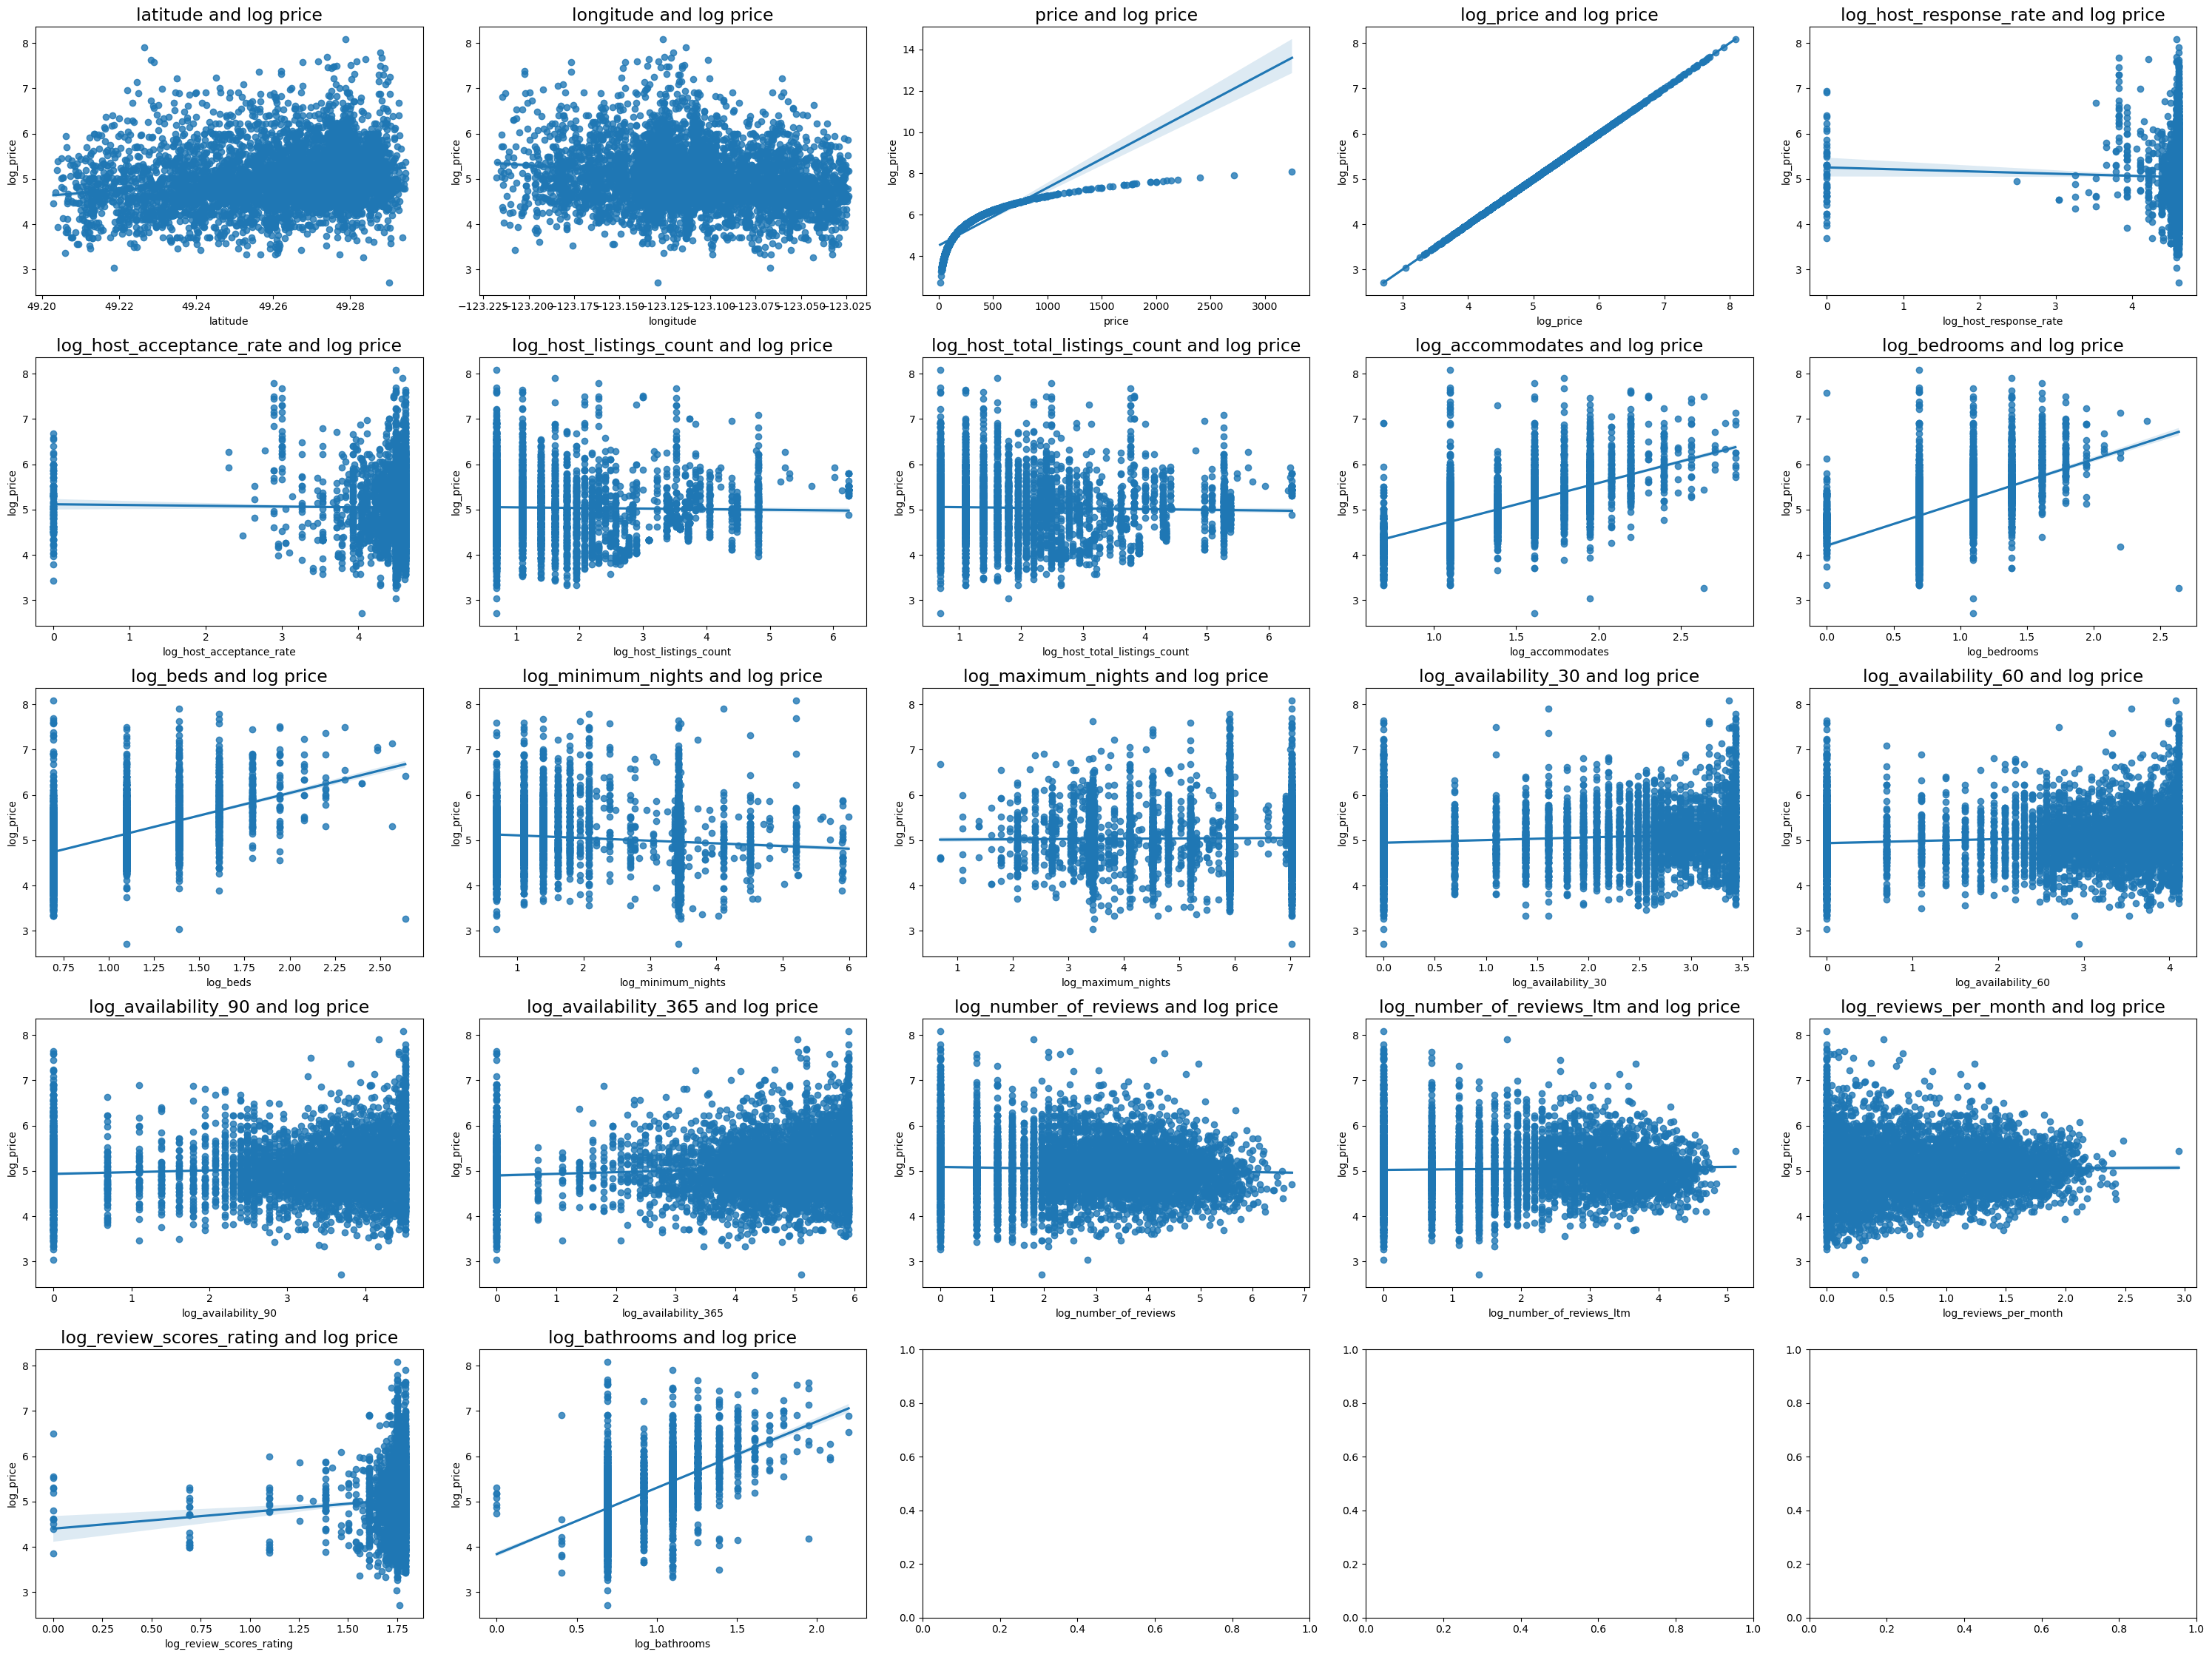

File execution completed.


<string>:168: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


Columns positively correlated with 'Log Price':
log_price                      1.000000
log_accommodates               0.611651
log_beds                       0.542805
log_bathrooms                  0.541409
log_bedrooms                   0.529060
amenity_dishwasher             0.270643
latitude                       0.218495
amenity_bathtub                0.190481
amenity_kitchen                0.141437
amenity_dedicated_workspace    0.137950
Name: log_price, dtype: float64

Columns negatively correlated with 'Log Price':
longitude            -0.175576
log_minimum_nights   -0.119466
amenity_heating      -0.081406
Name: log_price, dtype: float64


<string>:198: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<string>:198: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<string>:198: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<string>:198: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<string>:198: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<string>:198: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<string>:198: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version

Eigenvalues with multicollinearity:
['10.6779', '4.8003', '3.8406', '3.4818', '2.7168', '2.0412', '1.8513', '1.7468', '1.5721', '1.4196', '1.3385', '1.2575', '1.1388', '0.1112', '1.0601', '1.0542', '0.1279', '0.1472', '0.1539', '1.0284', '1.0109', '1.0049', '0.9953', '0.9769', '0.9666', '0.9343', '0.9211', '0.8917', '0.8550', '0.8585', '0.2281', '0.2418', '0.2702', '0.2673', '0.2898', '0.8152', '0.7967', '0.7900', '0.7662', '0.7549', '0.7486', '0.7396', '0.3104', '0.7077', '0.3333', '0.6885', '0.6793', '0.6549', '0.6514', '0.6353', '0.3511', '0.3745', '0.3766', '0.3968', '0.4094', '0.4104', '0.4310', '0.6056', '0.4523', '0.5862', '0.5694', '0.5592', '0.5468', '0.5227', '0.5156', '0.4966', '0.4888', '0.4834']


<string>:449: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<string>:449: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<string>:449: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<string>:449: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<string>:449: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<string>:449: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<string>:449: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version

File execution completed.


In [69]:
csv_path = 'outputs/3_pm_airbnb_vancouver.csv'

if os.path.isfile(csv_path):
    df_subset = pd.read_csv(csv_path)
    print('CSV file read successfully.')
else:
    exec(open('executables/3_PreModeling.py').read())
    print('File execution completed.')



# <a id='toc3_'></a>[2. Modeling Training](#toc0_)

We are not after accuracy, because we are doing a regression task, not a classification task. 
Our main metric will be mean squared error and we will try to minimize it with some methods such as hyperparameter tuning.

#### <a id='toc3_1_1_1_'></a>[Almost in every model we have sections such as:](#toc0_)
-Before Hyperparameter Tuning (We are trying model with default parameters)

-Train model with the default parameters

-See the error and r2 score

-Compare with other models and results

#### <a id='toc3_1_1_2_'></a>[After Hyperparameter Tuning:](#toc0_)

-Determine the parameter grid

-Do a gridsearch to get best model parameters

-Compare with the default model and other models


## <a id='toc3_2_'></a>[2.1. Train, Test Split](#toc0_)

In [70]:
# Assigning X and y
X = df_subset.drop(columns=['log_price'])
y= df_subset['log_price']


In [71]:
# Scale the data to normalize the dataset
columns = X.columns
scaler = StandardScaler()
X[columns] = scaler.fit_transform(X[columns])

# Split the data into training and test sets with stratification (Use of stratify because the dataset is imbalanced)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23, stratify=df_subset.room_type_entire_home_or_apt)

print('Dimensions of the training feature matrix: {}'.format(X_train.shape))
print('Dimensions of the test feature matrix: {}'.format(X_test.shape))

Dimensions of the training feature matrix: (4749, 128)
Dimensions of the test feature matrix: (1188, 128)



## <a id='toc3_3_'></a>[2.2. Models](#toc0_)


### <a id='toc3_3_1_'></a>[2.2.1 Linear Regression](#toc0_)


#### <a id='toc3_3_1_1_'></a>[2.2.1.1 Before Hyperparameter](#toc0_)

In [72]:
linear_model = LinearRegression().fit(X_train, y_train)
y_pred=linear_model_prediction = linear_model.predict(X_test)

linear_mse = metrics.mean_squared_error(y_test, y_pred)
linear_mae = metrics.mean_absolute_error(y_test, y_pred)
linear_rmse = np.sqrt(linear_mse)
linear_r2 = metrics.r2_score(y_test, y_pred)

print("Mean Squared Error: {:.2f}".format(linear_mse))
print("Mean Absolute Error: {:.2f}".format(linear_mae))
print("Root Mean Absolute Error: {:.2f}".format(linear_rmse))
print("R2 score: {:.2f}".format(linear_r2))

Mean Squared Error: 1785025989282812234039296.00
Mean Absolute Error: 67214213711.74
Root Mean Absolute Error: 1336048647797.98
R2 score: -4465136478081320971403264.00


The mse found with the linear regression is huge. Let's see how it possible to decrease the error by hyperparameter tuning for linear regression. 

In [73]:
# Adding information about predictions
prediction_dictionaries = {'Linear Regression - Default': y_pred}

prediction_list = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Linear Regression - Default': y_pred.flatten()}).head(20)
prediction_list.set_index('Actual Values', inplace=True)

prediction_list

Linear Regression - Default
Actual Values                             
5.48                                  5.27
5.41                                  5.30
4.88                                  4.71
5.98                                  5.16
4.51                                  4.55
5.63                                  5.80
4.01                                  4.14
5.18                                  5.05
4.95                                  5.03
5.50                                  5.45
3.58                                  4.24
5.86                                  5.27
4.79                                  4.99
5.30                                  5.08
5.44                                  4.90
5.61                                  4.89
4.98                                  5.27
5.51                                  5.55
5.67                                  4.45
5.76                                  5.55

In [74]:
# Error metrics for different models
error_dict = {'Linear Regression - Default': [linear_mse, linear_r2]}
error_list = pd.DataFrame()
error_list['Linear Regression - Default'] = ["{:.2f}".format(linear_mse), "{:.2f}".format(linear_r2)]

error_list.reset_index(inplace=True, drop=True)
error_list.index = ['Mean Squared Error', 'R2 Score']
error_list.T

Mean Squared Error  \
Linear Regression - Default  1785025989282812234039296.00   

                                                  R2 Score  
Linear Regression - Default  -4465136478081320971403264.00

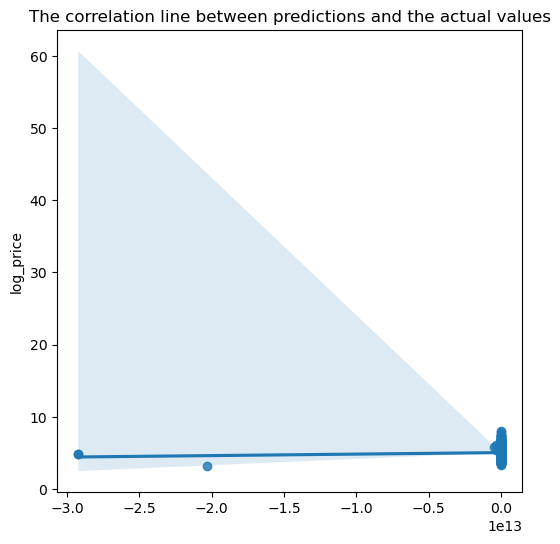

In [75]:
# Plot correlation line between predictions and actual values
plt.figure(figsize=(6, 6))
sns.regplot(x=y_pred, y=y_test)
plt.title("The correlation line between predictions and the actual values")
plt.show()


#### <a id='toc3_3_1_2_'></a>[2.2.1.2 After Hyperparameter](#toc0_)

In [76]:
# Since we cannot apply hyperparameter tuning into Linear Regression directly, we will use Ridge in order to apply Hyperparameter tuning.

alpha = [150,200, 250]
param_grid = {'alpha': alpha}

# Fit Ridge model with default alpha
ridge = Ridge(alpha=1).fit(X_train, y_train)
scores = cross_val_score(ridge, X_train, y_train, cv=5, scoring='r2')
scores_mse = cross_val_score(ridge, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

print("CV Mean for Ridge (r2): ", np.mean(scores))
print("CV Mean for Ridge (mse): ", np.mean(scores_mse) * -1)

# Apply Grid Search CV for hyperparameter tuning
grid_mse = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_result_mse = grid_mse.fit(X_train, y_train)

grid_r2 = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result_r2 = grid_r2.fit(X_train, y_train)

print()
print('Best Score for mse: ', grid_mse.best_score_ * -1)
print('Best Params for mse: ', grid_mse.best_params_)
print()
print('Best Score for r2: ', grid_r2.best_score_)
print('Best Params for r2: ', grid_r2.best_params_)


CV Mean for Ridge (r2):  0.6020851652695015
CV Mean for Ridge (mse):  0.14860525841795574
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits

Best Score for mse:  0.14831654960791352
Best Params for mse:  {'alpha': 200}

Best Score for r2:  0.6028924849082856
Best Params for r2:  {'alpha': 200}


In [77]:
# After using Grid Search CV, we found that alpha=200 is the best parameter for Ridge.

# Fit Ridge model with best alpha
ridge_best = Ridge(alpha=200).fit(X_train, y_train)
ridge_pred_best = ridge_best.predict(X_test)

# Calculate evaluation metrics for Ridge model with best alpha
ridge_mse_best = metrics.mean_squared_error(y_test, ridge_pred_best)
ridge_mae_best = metrics.mean_absolute_error(y_test, ridge_pred_best)
ridge_rmse_best = np.sqrt(ridge_mse_best)
ridge_r2_best = metrics.r2_score(y_test, ridge_pred_best)

print("Mean Squared Error: {}".format(ridge_mse_best))
print("Mean Absolute Error: {}".format(ridge_mae_best))
print("Root Mean Absolute Error: {}".format(ridge_rmse_best))
print("R2 score: {}".format(ridge_r2_best))

Mean Squared Error: 0.1774615256837174
Mean Absolute Error: 0.29411137966925643
Root Mean Absolute Error: 0.42126182557136294
R2 score: 0.5560905350713139


Overall, the results suggest that the Ridge regression model performs better than the linear regression model, as it achieves lower error metrics (MSE, MAE, RMSE) and a higher R2 score.

In [78]:
# Create a dictionary for R2 and MSE values of Linear Model and Ridge
dict_val = {
    'Linear Model': [linear_r2, linear_mse],
    'Ridge': [ridge_r2_best, ridge_mse_best]
}

# Create a DataFrame to store the R2 and MSE values
res_df_linear_ridge = pd.DataFrame(dict_val, index=['R2', 'MSE'])
res_df_linear_ridge

# Add the predictions of Ridge model to the prediction_dictionaries dictionary
prediction_dictionaries['Ridge'] = ridge_pred_best

# Add the predictions of Ridge model to the prediction_list DataFrame
prediction_list['Ridge'] = ridge_pred_best[:20]
prediction_list

Linear Regression - Default  Ridge
Actual Values                                    
5.48                                  5.27   5.27
5.41                                  5.30   5.30
4.88                                  4.71   4.69
5.98                                  5.16   5.13
4.51                                  4.55   4.56
5.63                                  5.80   5.79
4.01                                  4.14   4.16
5.18                                  5.05   5.07
4.95                                  5.03   5.04
5.50                                  5.45   5.45
3.58                                  4.24   4.25
5.86                                  5.27   5.25
4.79                                  4.99   4.99
5.30                                  5.08   5.09
5.44                                  4.90   4.90
5.61                                  4.89   4.89
4.98                                  5.27   5.27
5.51                                  5.55   5.54
5.67                                  4.45   4.45
5.76                                  5.55   5.54

In [79]:
# Add the MSE and R2 values of Ridge model to the error_list DataFrame
error_list['Ridge'] = ["{:.2f}".format(ridge_mse_best), "{:.2f}".format(ridge_r2_best)]
error_list.T

Mean Squared Error  \
Linear Regression - Default  1785025989282812234039296.00   
Ridge                                                0.18   

                                                  R2 Score  
Linear Regression - Default  -4465136478081320971403264.00  
Ridge                                                 0.56

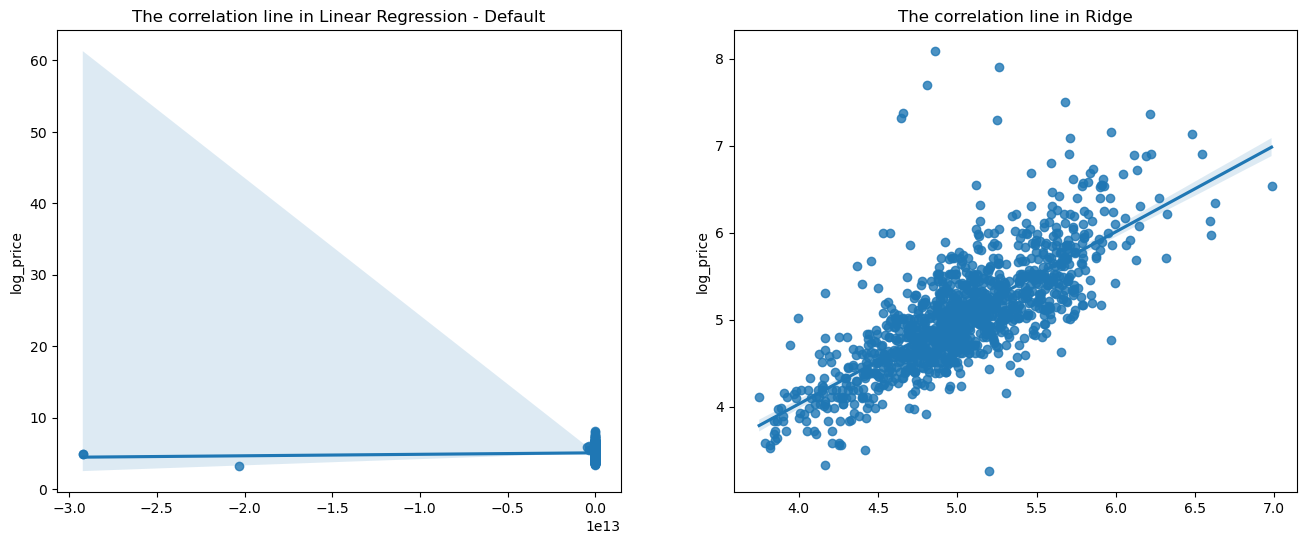

In [80]:
# Plot R2 values for all models
plot_all_r2()


### <a id='toc3_3_2_'></a>[2.2.2 Decision tree](#toc0_)


#### <a id='toc3_3_2_1_'></a>[2.2.2.1 Before Hyperparameter](#toc0_)

In [81]:
# Create a DecisionTreeRegressor model with default hyperparameters
tree_model = tree.DecisionTreeRegressor()

# Fit the DecisionTreeRegressor model to the training data
tree_model.fit(X_train, y_train)

# Make predictions using the DecisionTreeRegressor model on the test data
tree_model_prediction = tree_model.predict(X_test)

# Create a DataFrame to compare the actual values and predicted values
see_result = pd.DataFrame({'Actual': y_test, 'Predicted': tree_model_prediction})

# Calculate the MSE, MAE, RMSE, and R2 score for the DecisionTreeRegressor model
tree_mse = metrics.mean_squared_error(y_test, tree_model_prediction)
tree_mae = metrics.mean_absolute_error(y_test, tree_model_prediction)
tree_rmse = np.sqrt(tree_mse)
tree_r2 = metrics.r2_score(y_test, tree_model_prediction)

print("Mean Squared Error: {}".format(tree_mse))
print("Mean Absolute Error: {}".format(tree_mae))
print("Root Mean Absolute Error: {}".format(tree_rmse))
print("R2 score: {}".format(tree_r2))

Mean Squared Error: 0.28710159408670805
Mean Absolute Error: 0.378637300233158
Root Mean Absolute Error: 0.5358186205113705
R2 score: 0.2818324168003191


The MSE and MAE are quite low, but so is the r2 score. This is less good than Ridge, but better than Linear's result

In [82]:
# Add the predictions from Decision Tree with Default parameters to the prediction_list dictionary
prediction_list['Decision Tree - Default'] = np.array(tree_model_prediction[:20])
prediction_list

Linear Regression - Default  Ridge  Decision Tree - Default
Actual Values                                                             
5.48                                  5.27   5.27                     4.97
5.41                                  5.30   5.30                     5.71
4.88                                  4.71   4.69                     4.38
5.98                                  5.16   5.13                     4.54
4.51                                  4.55   4.56                     4.39
5.63                                  5.80   5.79                     6.40
4.01                                  4.14   4.16                     4.29
5.18                                  5.05   5.07                     5.49
4.95                                  5.03   5.04                     4.80
5.50                                  5.45   5.45                     5.04
3.58                                  4.24   4.25                     4.70
5.86                                  5.27   5.25                     5.20
4.79                                  4.99   4.99                     4.55
5.30                                  5.08   5.09                     5.64
5.44                                  4.90   4.90                     5.30
5.61                                  4.89   4.89                     4.91
4.98                                  5.27   5.27                     4.88
5.51                                  5.55   5.54                     5.54
5.67                                  4.45   4.45                     4.03
5.76                                  5.55   5.54                     4.95

In [83]:
# Add the MSE and R2 score for Decision Tree with Default parameters to the error_list dictionary
error_list['Decision Tree - Default'] = ["{:.2f}".format(tree_mse), "{:.2f}".format(tree_r2)]
error_list.T

Mean Squared Error  \
Linear Regression - Default  1785025989282812234039296.00   
Ridge                                                0.18   
Decision Tree - Default                              0.29   

                                                  R2 Score  
Linear Regression - Default  -4465136478081320971403264.00  
Ridge                                                 0.56  
Decision Tree - Default                               0.28

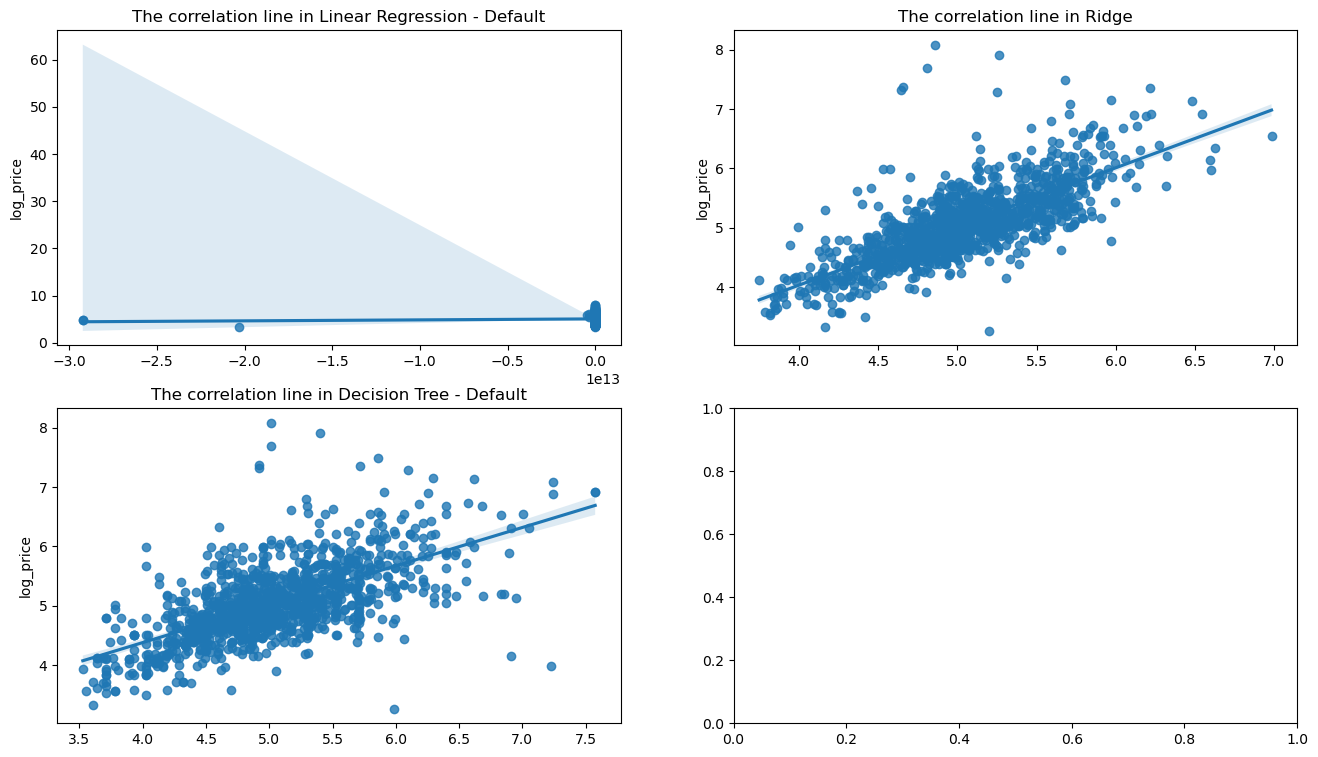

In [84]:
# Add the predictions from Decision Tree with Default parameters to the prediction_dictionaries dictionary
prediction_dictionaries['Decision Tree - Default'] = tree_model_prediction
plot_all_r2()


#### <a id='toc3_3_2_2_'></a>[2.2.2.2 After Hyperparameter](#toc0_)

Parameters that is used for Decision Tree Regressor:
- max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples
- min_samples_leaf:The minimum number of samples required to be at a leaf node
- min_samples_split:The minimum number of samples required to split an internal node

What we are going to do:
- Use grid search to fit all those parameters
- In each iteration use 5 cross validation points

In [85]:
parameters = {
    'max_depth': [ 5, 6, 7],
    'min_samples_leaf': [13,14,15],
    'min_samples_split': [2, 3],
}
tree_grid = GridSearchCV(tree_model, parameters, refit = True, verbose = 1, n_jobs=-1, cv=5, scoring="neg_mean_squared_error") 
tree_grid.fit(X, y)

print(f"Best parameters are {tree_grid.best_params_}") 
print("Best MSE is {}".format(tree_grid.best_score_ * -1))


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters are {'max_depth': 6, 'min_samples_leaf': 14, 'min_samples_split': 2}
Best MSE is 0.18467014441570587


In [86]:
# Create a DecisionTreeRegressor model with specified hyperparameters
tree_model_best = tree.DecisionTreeRegressor(max_depth=6, min_samples_leaf=14, min_samples_split=2)

# Fit the DecisionTreeRegressor model to the training data
tree_model_best.fit(X_train, y_train)

# Make predictions using the DecisionTreeRegressor model on the test data
tree_model_prediction_best = tree_model_best.predict(X_test)

# Calculate the MSE, MAE, RMSE, and R2 score for the DecisionTreeRegressor model
tree_mse_best = metrics.mean_squared_error(y_test, tree_model_prediction_best)
tree_mae_best = metrics.mean_absolute_error(y_test, tree_model_prediction_best)
tree_rmse_best = np.sqrt(tree_mse_best)
tree_r2_best = metrics.r2_score(y_test, tree_model_prediction_best)

print("Mean Squared Error: {}".format(tree_mse_best))
print("Mean Absolute Error: {}".format(tree_mae_best))
print("Root Mean Absolute Error: {}".format(tree_rmse_best))
print("R2 score: {}".format(tree_r2_best))

Mean Squared Error: 0.21473949027868253
Mean Absolute Error: 0.32617396420207156
Root Mean Absolute Error: 0.46339992477198627
R2 score: 0.46284192102257415


In [87]:
# R2 score has significantly increased from .28 to 0.47. However, the ridge model is still better

In [88]:
# Add the predictions from Decision Tree with best parameters to the prediction_list dictionary
prediction_list['Decision Tree - Best'] = np.array(tree_model_prediction_best[:20])
prediction_list

Linear Regression - Default  Ridge  Decision Tree - Default  \
Actual Values                                                                
5.48                                  5.27   5.27                     4.97   
5.41                                  5.30   5.30                     5.71   
4.88                                  4.71   4.69                     4.38   
5.98                                  5.16   5.13                     4.54   
4.51                                  4.55   4.56                     4.39   
5.63                                  5.80   5.79                     6.40   
4.01                                  4.14   4.16                     4.29   
5.18                                  5.05   5.07                     5.49   
4.95                                  5.03   5.04                     4.80   
5.50                                  5.45   5.45                     5.04   
3.58                                  4.24   4.25                     4.70   
5.86                                  5.27   5.25                     5.20   
4.79                                  4.99   4.99                     4.55   
5.30                                  5.08   5.09                     5.64   
5.44                                  4.90   4.90                     5.30   
5.61                                  4.89   4.89                     4.91   
4.98                                  5.27   5.27                     4.88   
5.51                                  5.55   5.54                     5.54   
5.67                                  4.45   4.45                     4.03   
5.76                                  5.55   5.54                     4.95   

               Decision Tree - Best  
Actual Values                        
5.48                           5.15  
5.41                           5.32  
4.88                           4.31  
5.98                           4.64  
4.51                           4.90  
5.63                           5.87  
4.01                           4.56  
5.18                           5.14  
4.95                           5.32  
5.50                           5.32  
3.58                           3.94  
5.86                           5.14  
4.79                           4.90  
5.30                           4.98  
5.44                           4.90  
5.61                           4.90  
4.98                           5.15  
5.51                           5.61  
5.67                           4.60  
5.76                           5.32

In [89]:
# Add the MSE and R2 score for Decision Tree with best parameters to the error_list dictionary
error_list['Decision Tree - Best'] = ["{:.2f}".format(tree_mse_best), "{:.2f}".format(tree_r2_best)]
error_list.T

Mean Squared Error  \
Linear Regression - Default  1785025989282812234039296.00   
Ridge                                                0.18   
Decision Tree - Default                              0.29   
Decision Tree - Best                                 0.21   

                                                  R2 Score  
Linear Regression - Default  -4465136478081320971403264.00  
Ridge                                                 0.56  
Decision Tree - Default                               0.28  
Decision Tree - Best                                  0.46

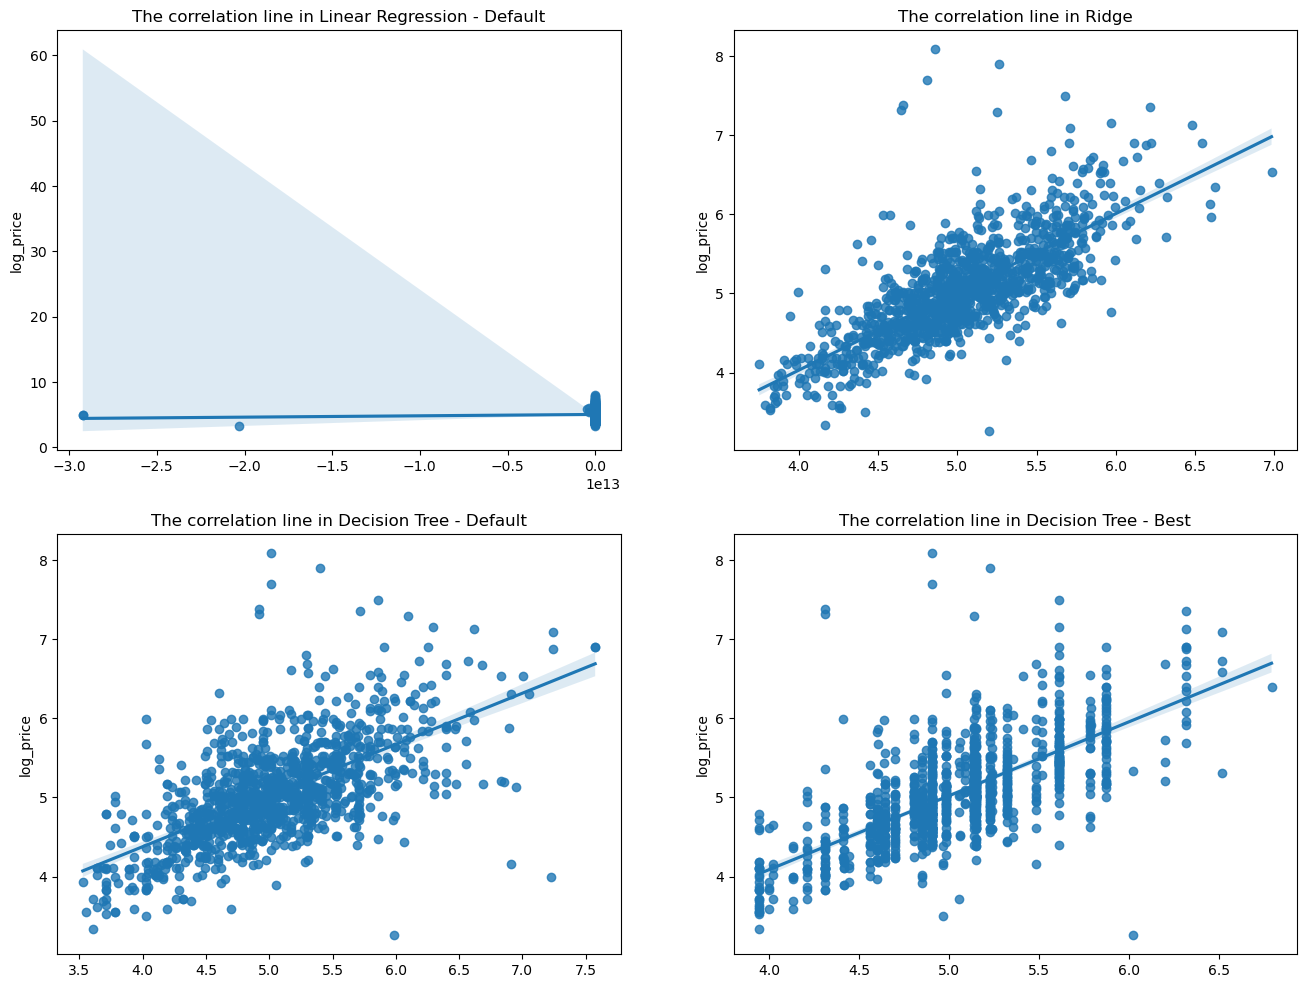

In [90]:
# Add the predictions from Decision Tree with best parameters to the prediction_dictionaries dictionary
prediction_dictionaries['Decision Tree - Best'] = tree_model_prediction_best
plot_all_r2()

The size of the group of points is significantly lower by using the best model of Decision Tree compare to the default Decision Tree.


### <a id='toc3_3_3_'></a>[2.2.3 Random Forest](#toc0_)
Random Forest is supervised machine learning algorithms which can be used for regression.



#### <a id='toc3_3_3_1_'></a>[2.2.3.1 Before Hyperparameter](#toc0_)

In [91]:
# Create a RandomForestRegressor model with default parameters and a random state of 23
forest_model = RandomForestRegressor(random_state=23)

# Fit the RandomForestRegressor model to the training data
forest_model.fit(X_train, y_train)

# Make predictions using the RandomForestRegressor model on the test data
forest_model_prediction = forest_model.predict(X_test)

# Calculate the MSE, MAE, RMSE, and R2 score for the RandomForestRegressor model
forest_mse = metrics.mean_squared_error(y_test, forest_model_prediction)
forest_mae = metrics.mean_absolute_error(y_test, forest_model_prediction)
forest_rmse = np.sqrt(forest_mse)
forest_r2 = metrics.r2_score(y_test, forest_model_prediction)

print("Mean Squared Error: {}".format(forest_mse))
print("Mean Absolute Error: {}".format(forest_mae))
print("Root Mean Absolute Error: {}".format(forest_rmse))
print("R2 score: {}".format(forest_r2))

Mean Squared Error: 0.1560039160746275
Mean Absolute Error: 0.27200305798793895
Root Mean Absolute Error: 0.3949733105851932
R2 score: 0.6097654708835765


Default random forest gives the best solution so far

In [92]:
# Add the predictions from Random Forest with default parameters to the prediction_list dictionary
prediction_list['Random Forest - Default'] = np.array(forest_model_prediction[:20])
prediction_list

Linear Regression - Default  Ridge  Decision Tree - Default  \
Actual Values                                                                
5.48                                  5.27   5.27                     4.97   
5.41                                  5.30   5.30                     5.71   
4.88                                  4.71   4.69                     4.38   
5.98                                  5.16   5.13                     4.54   
4.51                                  4.55   4.56                     4.39   
5.63                                  5.80   5.79                     6.40   
4.01                                  4.14   4.16                     4.29   
5.18                                  5.05   5.07                     5.49   
4.95                                  5.03   5.04                     4.80   
5.50                                  5.45   5.45                     5.04   
3.58                                  4.24   4.25                     4.70   
5.86                                  5.27   5.25                     5.20   
4.79                                  4.99   4.99                     4.55   
5.30                                  5.08   5.09                     5.64   
5.44                                  4.90   4.90                     5.30   
5.61                                  4.89   4.89                     4.91   
4.98                                  5.27   5.27                     4.88   
5.51                                  5.55   5.54                     5.54   
5.67                                  4.45   4.45                     4.03   
5.76                                  5.55   5.54                     4.95   

               Decision Tree - Best  Random Forest - Default  
Actual Values                                                 
5.48                           5.15                     5.14  
5.41                           5.32                     5.29  
4.88                           4.31                     4.58  
5.98                           4.64                     4.98  
4.51                           4.90                     4.59  
5.63                           5.87                     6.08  
4.01                           4.56                     4.22  
5.18                           5.14                     5.04  
4.95                           5.32                     5.18  
5.50                           5.32                     5.33  
3.58                           3.94                     4.13  
5.86                           5.14                     5.14  
4.79                           4.90                     4.77  
5.30                           4.98                     5.64  
5.44                           4.90                     5.32  
5.61                           4.90                     4.77  
4.98                           5.15                     5.21  
5.51                           5.61                     5.62  
5.67                           4.60                     4.40  
5.76                           5.32                     5.35

In [93]:
# Add the MSE and R2 score for Random Forest with default parameters to the error_list dictionary
error_list['Random Forest - Default'] = ["{:.2f}".format(forest_mse), "{:.2f}".format(forest_r2)]
error_list.T

Mean Squared Error  \
Linear Regression - Default  1785025989282812234039296.00   
Ridge                                                0.18   
Decision Tree - Default                              0.29   
Decision Tree - Best                                 0.21   
Random Forest - Default                              0.16   

                                                  R2 Score  
Linear Regression - Default  -4465136478081320971403264.00  
Ridge                                                 0.56  
Decision Tree - Default                               0.28  
Decision Tree - Best                                  0.46  
Random Forest - Default                               0.61

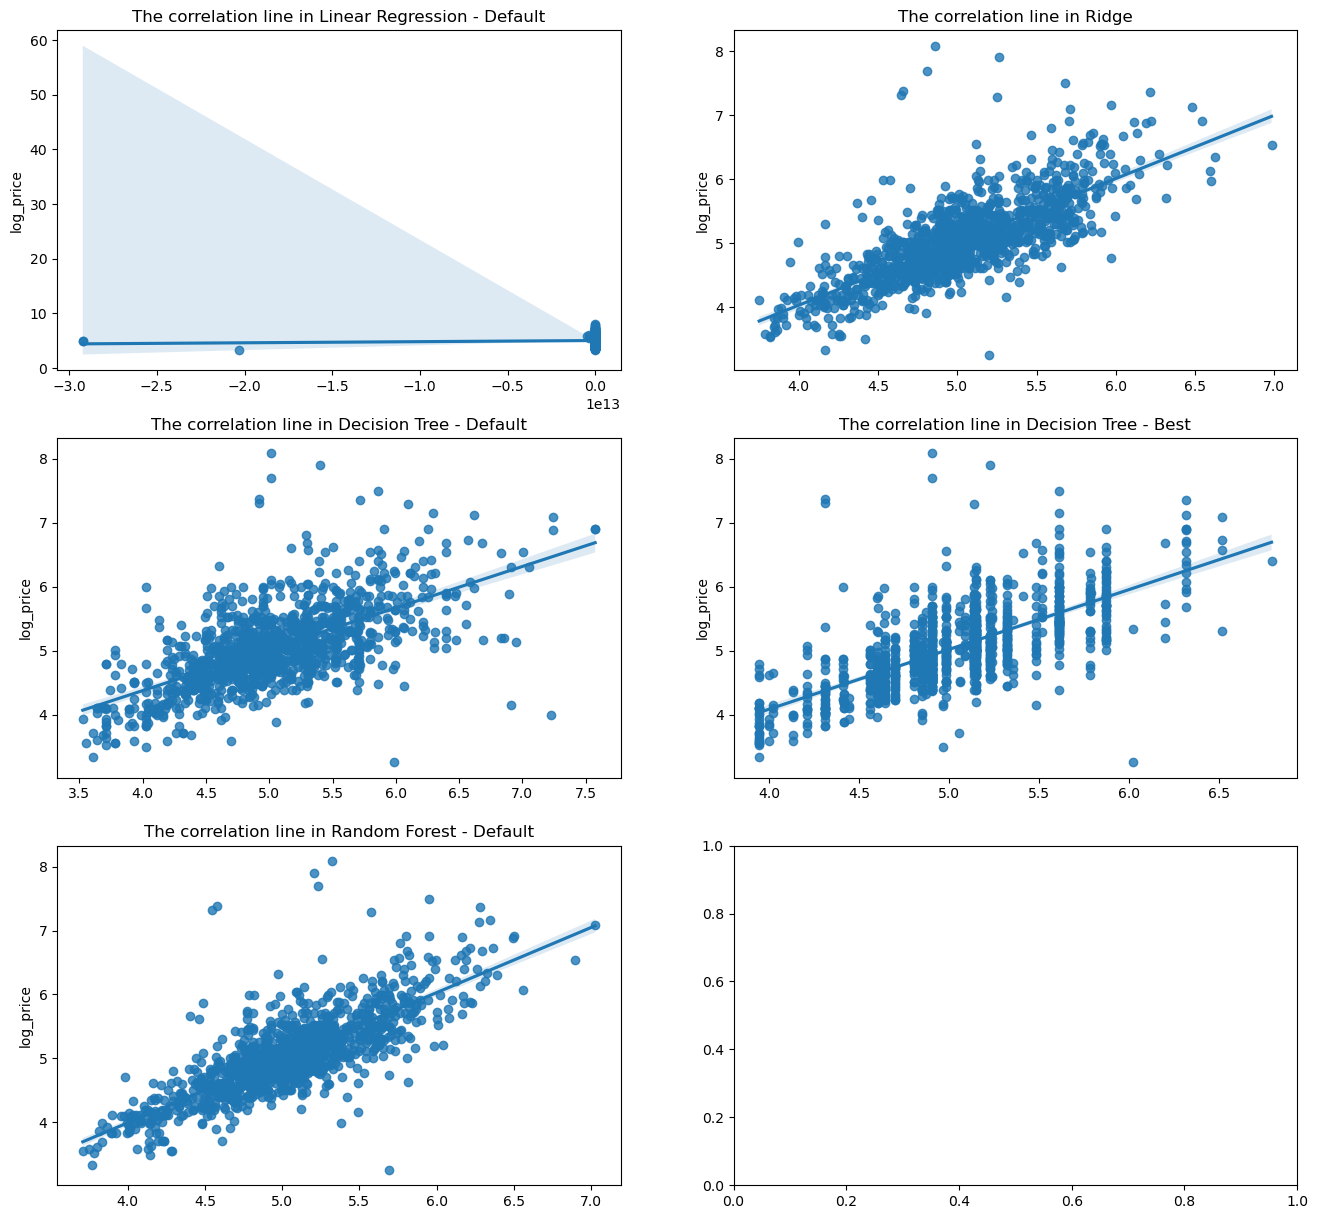

In [94]:
# Add the predictions from Random Forest with default parameters to the prediction_dictionaries dictionary
prediction_dictionaries['Random Forest - Default'] = forest_model_prediction
plot_all_r2()

The points are more spread in the Random Forest. Since the Random Forest runs lots of Decision Tree's and get the best tree as the classifier, it is expected to have a better performance than with Decision Tree. 


#### <a id='toc3_3_3_2_'></a>[2.2.3.2 After Hyperparameter](#toc0_)

In [95]:
# Create a GridSearchCV instance to search for the best combination of hyperparameters. 

parameters = {
    'n_estimators': [200,250,350],  # Number of trees in the forest
    'max_depth': [None, 2],  # Maximum depth of each tree
    'min_samples_split': [2,5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1,2,3]  # Minimum number of samples required to be at a leaf node
}


#forest_grid = GridSearchCV(forest_model, parameters, cv=5, scoring='neg_mean_squared_error')
#forest_grid.fit(X_train, y_train)

#print("Best parameters are:", forest_grid.best_params_)
#print("Best MSE is:", -forest_grid.best_score_)

In [96]:
#Create a new Random Forest model using the best hyperparameters found. (COMMENT IF PREVIOUS LINE IS UNCOMMENTED)
best_params={'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 250}

In [97]:
#Create a new Random Forest model using the best hyperparameters found.
forest_model_best = RandomForestRegressor(random_state=23, **best_params)
#Fit the new Random Forest model to the training data and make predictions on the test data.
forest_model_best.fit(X_train, y_train)
forest_model_prediction_best = forest_model_best.predict(X_test)

#Evaluate the performance of the tuned Random Forest model using various metrics.
forest_mse_best = metrics.mean_squared_error(y_test, forest_model_prediction_best)
forest_mae_best = metrics.mean_absolute_error(y_test, forest_model_prediction_best)
forest_rmse_best = np.sqrt(forest_mse_best)
forest_r2_best = metrics.r2_score(y_test, forest_model_prediction_best)

print("Mean Squared Error:", forest_mse_best)
print("Mean Absolute Error:", forest_mae_best)
print("Root Mean Absolute Error:", forest_rmse_best)
print("R2 score:", forest_r2_best)

Mean Squared Error: 0.15494336231976802
Mean Absolute Error: 0.2705300391940771
Root Mean Absolute Error: 0.3936284572026875
R2 score: 0.6124183831023458


The performance is a little bit better than the default Random Forest as the MSE decreased by 0.006 and the R2 score increased by 0.03. The difference is so minimal that we can consider that they perform as good as each other

In [98]:
# Add the predictions from Random Forest with best parameters to the prediction_list dictionary
prediction_list['Random Forest - Best'] = np.array(forest_model_prediction_best[:20])
prediction_list

Linear Regression - Default  Ridge  Decision Tree - Default  \
Actual Values                                                                
5.48                                  5.27   5.27                     4.97   
5.41                                  5.30   5.30                     5.71   
4.88                                  4.71   4.69                     4.38   
5.98                                  5.16   5.13                     4.54   
4.51                                  4.55   4.56                     4.39   
5.63                                  5.80   5.79                     6.40   
4.01                                  4.14   4.16                     4.29   
5.18                                  5.05   5.07                     5.49   
4.95                                  5.03   5.04                     4.80   
5.50                                  5.45   5.45                     5.04   
3.58                                  4.24   4.25                     4.70   
5.86                                  5.27   5.25                     5.20   
4.79                                  4.99   4.99                     4.55   
5.30                                  5.08   5.09                     5.64   
5.44                                  4.90   4.90                     5.30   
5.61                                  4.89   4.89                     4.91   
4.98                                  5.27   5.27                     4.88   
5.51                                  5.55   5.54                     5.54   
5.67                                  4.45   4.45                     4.03   
5.76                                  5.55   5.54                     4.95   

               Decision Tree - Best  Random Forest - Default  \
Actual Values                                                  
5.48                           5.15                     5.14   
5.41                           5.32                     5.29   
4.88                           4.31                     4.58   
5.98                           4.64                     4.98   
4.51                           4.90                     4.59   
5.63                           5.87                     6.08   
4.01                           4.56                     4.22   
5.18                           5.14                     5.04   
4.95                           5.32                     5.18   
5.50                           5.32                     5.33   
3.58                           3.94                     4.13   
5.86                           5.14                     5.14   
4.79                           4.90                     4.77   
5.30                           4.98                     5.64   
5.44                           4.90                     5.32   
5.61                           4.90                     4.77   
4.98                           5.15                     5.21   
5.51                           5.61                     5.62   
5.67                           4.60                     4.40   
5.76                           5.32                     5.35   

               Random Forest - Best  
Actual Values                        
5.48                           5.17  
5.41                           5.35  
4.88                           4.60  
5.98                           5.01  
4.51                           4.56  
5.63                           6.10  
4.01                           4.25  
5.18                           5.05  
4.95                           5.23  
5.50                           5.34  
3.58                           4.11  
5.86                           5.14  
4.79                           4.75  
5.30                           5.55  
5.44                           5.29  
5.61                           4.82  
4.98                           5.16  
5.51                           5.52  
5.67                           4.42  
5.76                           5.36

In [99]:
# Add the MSE and R2 score for Random Forest with best parameters to the error_list dictionary
error_list['Random Forest - Best'] = ["{:.2f}".format(forest_mse_best), "{:.2f}".format(forest_r2_best)]
error_list.T

Mean Squared Error  \
Linear Regression - Default  1785025989282812234039296.00   
Ridge                                                0.18   
Decision Tree - Default                              0.29   
Decision Tree - Best                                 0.21   
Random Forest - Default                              0.16   
Random Forest - Best                                 0.15   

                                                  R2 Score  
Linear Regression - Default  -4465136478081320971403264.00  
Ridge                                                 0.56  
Decision Tree - Default                               0.28  
Decision Tree - Best                                  0.46  
Random Forest - Default                               0.61  
Random Forest - Best                                  0.61

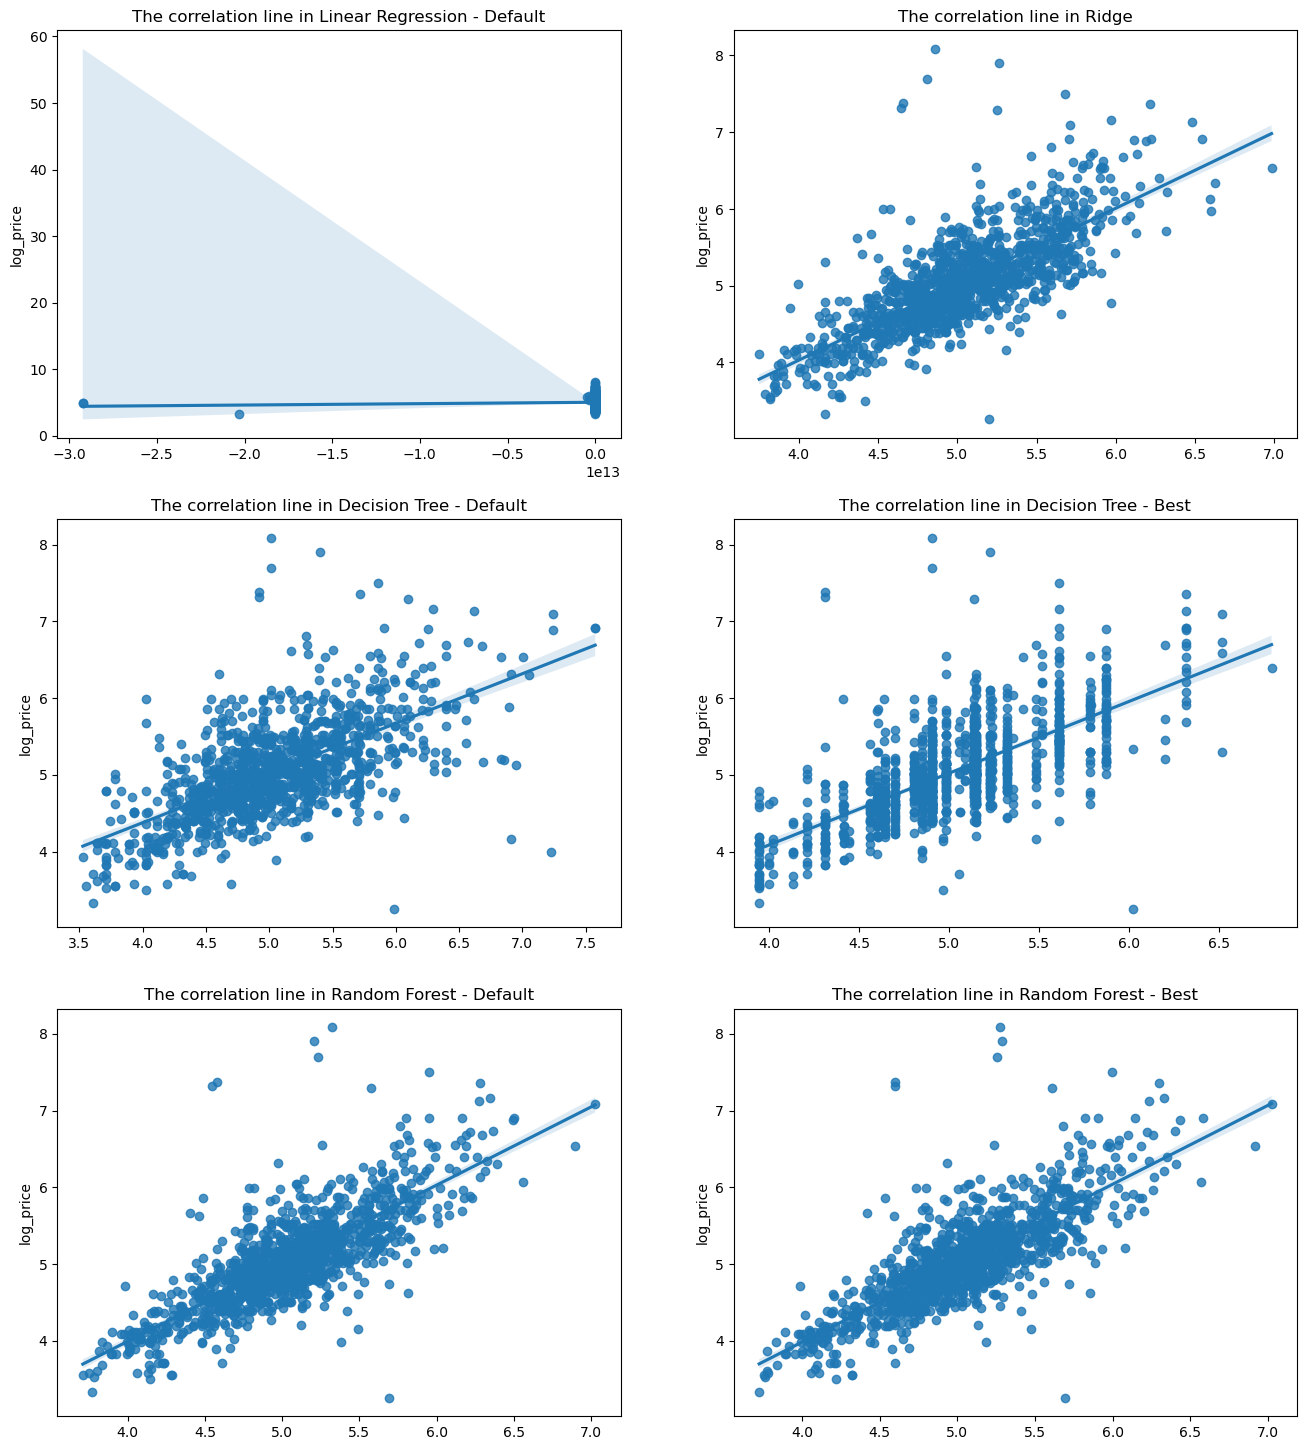

In [100]:
# Add the predictions from Random Forest with best parameters to the prediction_dictionaries dictionary
prediction_dictionaries['Random Forest - Best'] = forest_model_prediction_best
plot_all_r2()


### <a id='toc3_3_4_'></a>[2.2.4 KNN Neighbour](#toc0_)


#### <a id='toc3_3_4_1_'></a>[2.2.4.1 Before Hyperparameter](#toc0_)

In [101]:
# Create a KNeighborsRegressor model with 5 neighbors and using the Euclidean metric
knn = KNeighborsRegressor(5, metric="euclidean")

# Fit the KNeighborsRegressor model to the training data
knn.fit(X_train, y_train)

# Make predictions using the KNeighborsRegressor model on the test data
knn_prediction = knn.predict(X_test)

# Calculate the MSE, MAE, RMSE, and R2 score for the KNeighborsRegressor model
knn_mse = mean_squared_error(y_pred, y_test)
knn_mae = mean_absolute_error(y_pred, y_test)
knn_rmse = np.sqrt(knn_mse)
knn_r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: {}".format(knn_mse))
print("Mean Absolute Error: {}".format(knn_mae))
print("Root Mean Absolute Error: {}".format(knn_rmse))
print("R2 score: {}".format(knn_r2))

Mean Squared Error: 1.7850259892828122e+24
Mean Absolute Error: 67214213711.736824
Root Mean Absolute Error: 1336048647797.9805
R2 score: -4.465136478081321e+24


In [102]:
# Add the predictions from KNN with Default parameters to the prediction_list dictionary
prediction_list['KNN - Default'] = np.array(knn_prediction[:20])
prediction_list

Linear Regression - Default  Ridge  Decision Tree - Default  \
Actual Values                                                                
5.48                                  5.27   5.27                     4.97   
5.41                                  5.30   5.30                     5.71   
4.88                                  4.71   4.69                     4.38   
5.98                                  5.16   5.13                     4.54   
4.51                                  4.55   4.56                     4.39   
5.63                                  5.80   5.79                     6.40   
4.01                                  4.14   4.16                     4.29   
5.18                                  5.05   5.07                     5.49   
4.95                                  5.03   5.04                     4.80   
5.50                                  5.45   5.45                     5.04   
3.58                                  4.24   4.25                     4.70   
5.86                                  5.27   5.25                     5.20   
4.79                                  4.99   4.99                     4.55   
5.30                                  5.08   5.09                     5.64   
5.44                                  4.90   4.90                     5.30   
5.61                                  4.89   4.89                     4.91   
4.98                                  5.27   5.27                     4.88   
5.51                                  5.55   5.54                     5.54   
5.67                                  4.45   4.45                     4.03   
5.76                                  5.55   5.54                     4.95   

               Decision Tree - Best  Random Forest - Default  \
Actual Values                                                  
5.48                           5.15                     5.14   
5.41                           5.32                     5.29   
4.88                           4.31                     4.58   
5.98                           4.64                     4.98   
4.51                           4.90                     4.59   
5.63                           5.87                     6.08   
4.01                           4.56                     4.22   
5.18                           5.14                     5.04   
4.95                           5.32                     5.18   
5.50                           5.32                     5.33   
3.58                           3.94                     4.13   
5.86                           5.14                     5.14   
4.79                           4.90                     4.77   
5.30                           4.98                     5.64   
5.44                           4.90                     5.32   
5.61                           4.90                     4.77   
4.98                           5.15                     5.21   
5.51                           5.61                     5.62   
5.67                           4.60                     4.40   
5.76                           5.32                     5.35   

               Random Forest - Best  KNN - Default  
Actual Values                                       
5.48                           5.17           5.37  
5.41                           5.35           5.41  
4.88                           4.60           5.19  
5.98                           5.01           4.30  
4.51                           4.56           4.55  
5.63                           6.10           4.81  
4.01                           4.25           4.14  
5.18                           5.05           5.14  
4.95                           5.23           5.21  
5.50                           5.34           5.13  
3.58                           4.11           4.64  
5.86                           5.14           5.12  
4.79                           4.75           4.91  
5.30                           5.55           5.60  
5.44                           5.29      

In [103]:
# Add the MSE and R2 score for KNN with Default parameters to the error_list dictionary
error_list['KNN - Default'] = ["{:.2f}".format(knn_mse), "{:.2f}".format(knn_r2)]
error_list.T

Mean Squared Error  \
Linear Regression - Default  1785025989282812234039296.00   
Ridge                                                0.18   
Decision Tree - Default                              0.29   
Decision Tree - Best                                 0.21   
Random Forest - Default                              0.16   
Random Forest - Best                                 0.15   
KNN - Default                1785025989282812234039296.00   

                                                  R2 Score  
Linear Regression - Default  -4465136478081320971403264.00  
Ridge                                                 0.56  
Decision Tree - Default                               0.28  
Decision Tree - Best                                  0.46  
Random Forest - Default                               0.61  
Random Forest - Best                                  0.61  
KNN - Default                -4465136478081320971403264.00

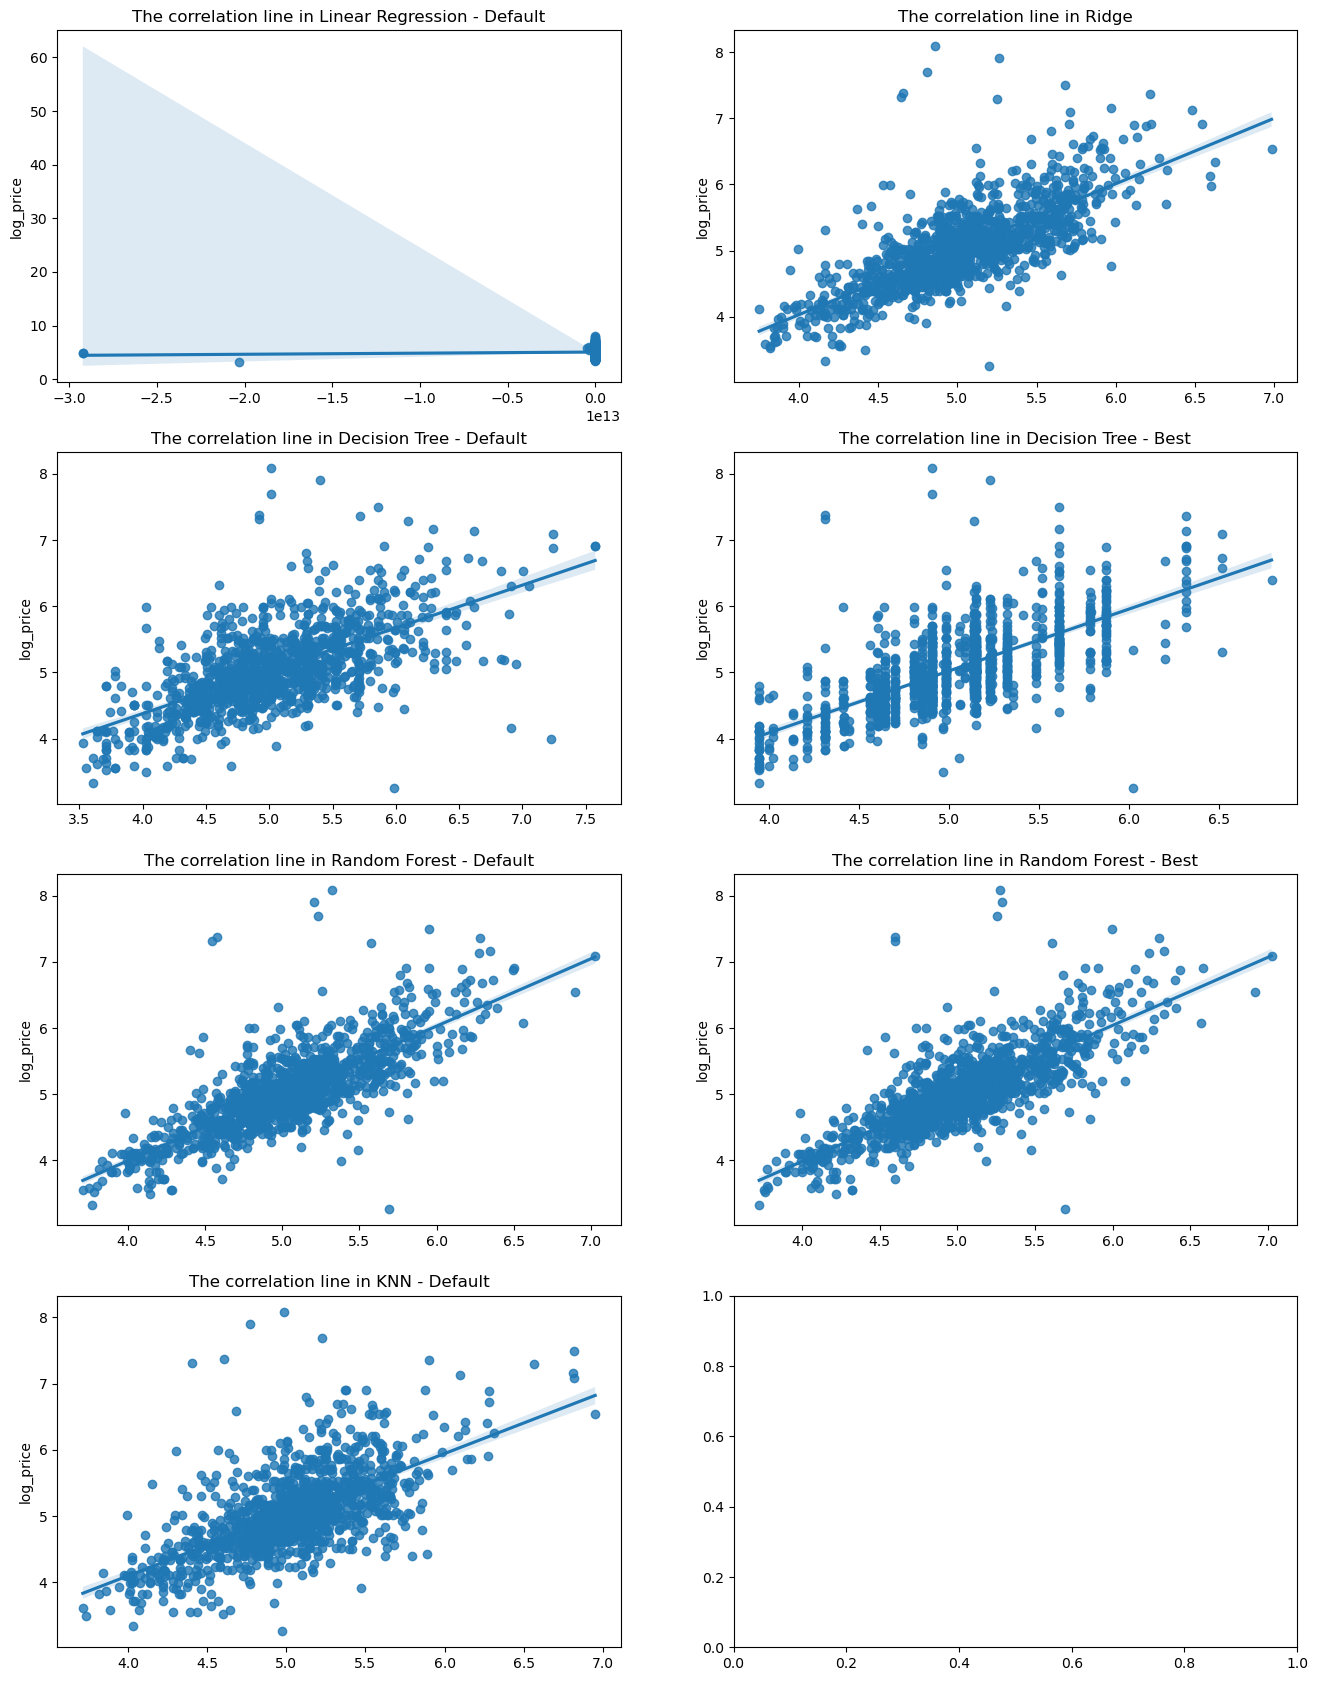

In [104]:
# Add the predictions from KNN with Default parameters to the prediction_dictionaries dictionary
prediction_dictionaries['KNN - Default'] = knn_prediction
plot_all_r2()


#### <a id='toc3_3_4_2_'></a>[2.2.4.2 After Hyperparameter](#toc0_)

Since we have hyperparamaters such as number of nearest neighbour, or distance metric, we will apply hyperparameter tuning to see if we can decrease the error. Let's test it by:
- Number of Neighbours(1, .... ,10)
- LDistance Function (1: Euclidean --> p=2, 2: Manhattan (--> p=1))

In [105]:
param_grid = {
    'p': [1, 2],
    'n_neighbors': [10,15,20]
}

# Create GridSearchCV object for KNeighborsRegressor with specified parameters
grid_knn = GridSearchCV(KNeighborsRegressor(n_jobs=-1), param_grid, refit=True, verbose=10, n_jobs=-1, cv=5, scoring="neg_mean_squared_error")

# Fit the grid search object to the data
grid_knn.fit(X, y)

print(f"Best parameters are {grid_knn.best_params_}")
print("Best score is {}".format(grid_knn.best_score_ * -1))
print("Best model is {}".format(grid_knn.best_estimator_))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


Best parameters are {'n_neighbors': 15, 'p': 1}
Best score is 0.2058982968921871
Best model is KNeighborsRegressor(n_jobs=-1, n_neighbors=15, p=1)


In [106]:
# Create a KNeighborsRegressor model with the best hyperparameters found through GridSearchCV
knr_best = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=15, p=1,
                    weights='uniform')

# Fit the KNeighborsRegressor model to the training data
knr_best.fit(X_train, y_train)

# Make predictions using the KNeighborsRegressor model on the test data
knn_best_pred = knr_best.predict(X_test)

# Calculate the MSE, MAE, RMSE, and R2 score for the KNeighborsRegressor model with the best hyperparameters
knn_mse_best = mean_squared_error(knn_best_pred, y_test)
knn_mae_best = mean_absolute_error(y_pred, y_test)
knn_rmse_best = np.sqrt(knn_mse_best)
knn_r2_best = r2_score(y_test, knn_best_pred)

print("Mean Squared Error: {}".format(knn_mse_best))
print("Mean Absolute Error: {}".format(knn_mae_best))
print("Root Mean Absolute Error: {}".format(knn_rmse_best))
print("R2 score: {}".format(knn_r2_best))

Mean Squared Error: 0.20624856038271772
Mean Absolute Error: 67214213711.736824
Root Mean Absolute Error: 0.45414596814539454
R2 score: 0.48408147777913224


In [107]:
# Add the predictions from the KNeighborsRegressor model with the best hyperparameters to the prediction_list DataFrame
prediction_list['KNN-Best'] = knn_best_pred[:20]

In [108]:
# Add the MSE and R2 score of the KNeighborsRegressor model with the best hyperparameters to the error_list DataFrame
error_list['KNN-Best'] = ["{:.2f}".format(knn_mse_best), "{:.2f}".format(knn_r2_best)]
error_list.T

Mean Squared Error  \
Linear Regression - Default  1785025989282812234039296.00   
Ridge                                                0.18   
Decision Tree - Default                              0.29   
Decision Tree - Best                                 0.21   
Random Forest - Default                              0.16   
Random Forest - Best                                 0.15   
KNN - Default                1785025989282812234039296.00   
KNN-Best                                             0.21   

                                                  R2 Score  
Linear Regression - Default  -4465136478081320971403264.00  
Ridge                                                 0.56  
Decision Tree - Default                               0.28  
Decision Tree - Best                                  0.46  
Random Forest - Default                               0.61  
Random Forest - Best                                  0.61  
KNN - Default                -4465136478081320971403264.00  
KNN-Best                                              0.48

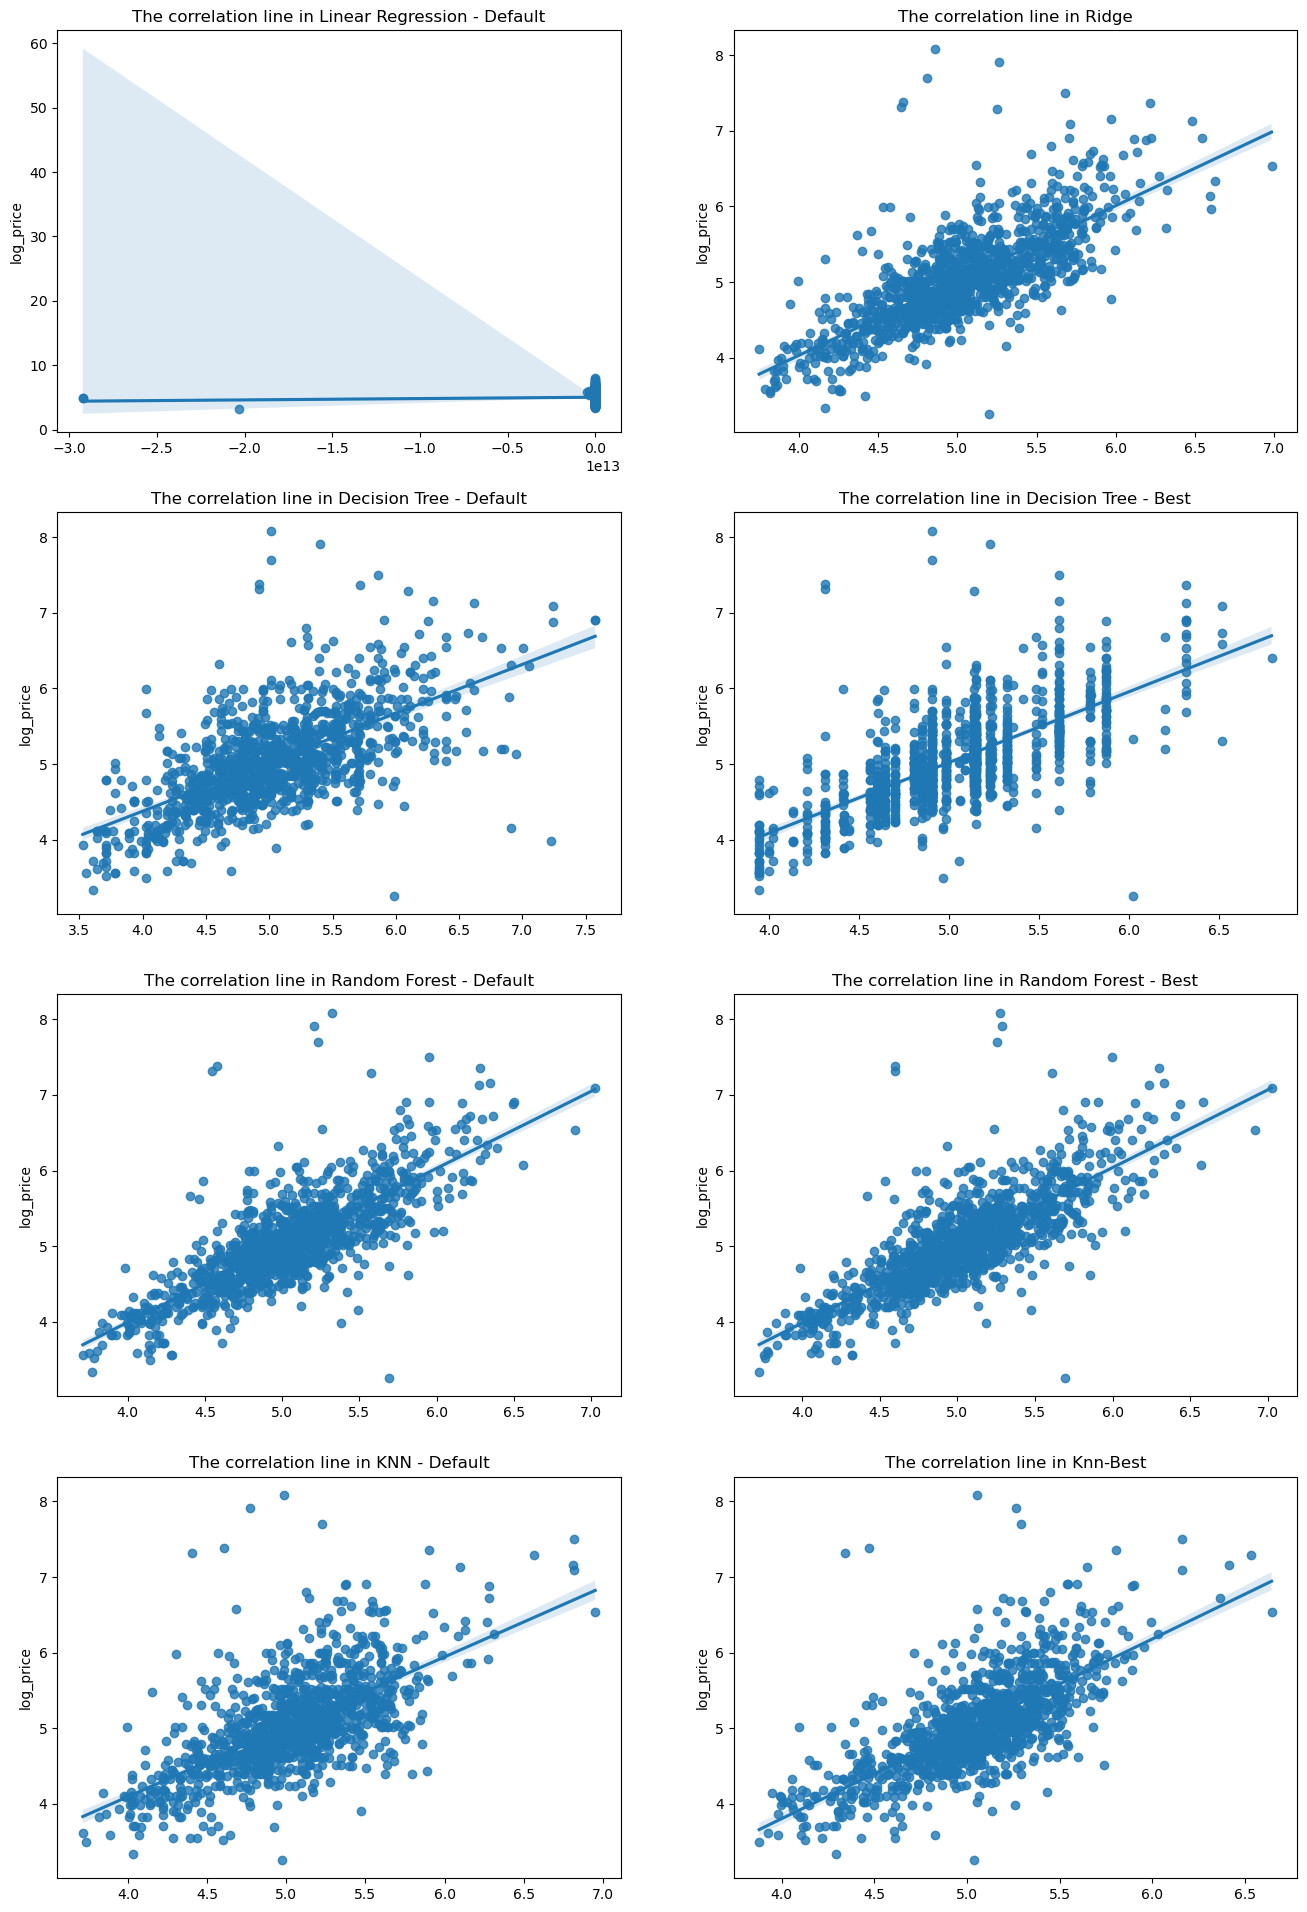

In [109]:
# Add the predictions from the KNeighborsRegressor model with the best hyperparameters to the prediction_dictionaries dictionary
prediction_dictionaries['Knn-Best'] = knn_best_pred
plot_all_r2()


### <a id='toc3_3_5_'></a>[2.2.4 XGBoost](#toc0_)


#### <a id='toc3_3_5_1_'></a>[2.2.4.1 Before Hyperparameter](#toc0_)

In [110]:
# Create a XGBoost model with default parameters and a random state of 23
xgb = xgb.XGBRegressor(random_state=23)
#Fit the XGBoost model to the training data
xgb.fit(X_train, y_train)
#Make predictions using the XGBoost model on the test data
xgb_prediction = xgb.predict(X_test)
#Calculate the MSE, MAE, RMSE, and R2 score for the XGBoost model:
xgb_mse = metrics.mean_squared_error(y_test, xgb_prediction)
xgb_mae = metrics.mean_absolute_error(y_test, xgb_prediction)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = metrics.r2_score(y_test, xgb_prediction)

print("Mean Squared Error: {}".format(xgb_mse))
print("Mean Absolute Error: {}".format(xgb_mae))
print("Root Mean Absolute Error: {}".format(xgb_rmse))
print("R2 score: {}".format(xgb_r2))

Mean Squared Error: 0.1525810916208323
Mean Absolute Error: 0.2730117568409752
Root Mean Absolute Error: 0.3906162971777193
R2 score: 0.6183274629321349


In [111]:
# Add the predictions from XGBoost with default parameters to the prediction_list dictionary
prediction_list['XGBoost - Default'] = np.array(xgb_prediction[:20])
prediction_list


Linear Regression - Default  Ridge  Decision Tree - Default  \
Actual Values                                                                
5.48                                  5.27   5.27                     4.97   
5.41                                  5.30   5.30                     5.71   
4.88                                  4.71   4.69                     4.38   
5.98                                  5.16   5.13                     4.54   
4.51                                  4.55   4.56                     4.39   
5.63                                  5.80   5.79                     6.40   
4.01                                  4.14   4.16                     4.29   
5.18                                  5.05   5.07                     5.49   
4.95                                  5.03   5.04                     4.80   
5.50                                  5.45   5.45                     5.04   
3.58                                  4.24   4.25                     4.70   
5.86                                  5.27   5.25                     5.20   
4.79                                  4.99   4.99                     4.55   
5.30                                  5.08   5.09                     5.64   
5.44                                  4.90   4.90                     5.30   
5.61                                  4.89   4.89                     4.91   
4.98                                  5.27   5.27                     4.88   
5.51                                  5.55   5.54                     5.54   
5.67                                  4.45   4.45                     4.03   
5.76                                  5.55   5.54                     4.95   

               Decision Tree - Best  Random Forest - Default  \
Actual Values                                                  
5.48                           5.15                     5.14   
5.41                           5.32                     5.29   
4.88                           4.31                     4.58   
5.98                           4.64                     4.98   
4.51                           4.90                     4.59   
5.63                           5.87                     6.08   
4.01                           4.56                     4.22   
5.18                           5.14                     5.04   
4.95                           5.32                     5.18   
5.50                           5.32                     5.33   
3.58                           3.94                     4.13   
5.86                           5.14                     5.14   
4.79                           4.90                     4.77   
5.30                           4.98                     5.64   
5.44                           4.90                     5.32   
5.61                           4.90                     4.77   
4.98                           5.15                     5.21   
5.51                           5.61                     5.62   
5.67                           4.60                     4.40   
5.76                           5.32                     5.35   

               Random Forest - Best  KNN - Default  KNN-Best  \
Actual Values                                                  
5.48                           5.17           5.37      5.42   
5.41                           5.35           5.41      5.28   
4.88                           4.60           5.19      4.69   
5.98                           5.01           4.30      5.02   
4.51                           4.56           4.55      4.46   
5.63                           6.10           4.81      5.17   
4.01                           4.25           4.14      4.13   
5.18                           5.05           5.14      5.09   
4.95                           5.23           5.21      5.22   
5.50                           5.34           5.13      5.33   
3.58                           4.11           4.64      4.83   
5.86                           5.14           5.12      5

In [112]:
# Add the MSE and R2 score for XGBoost with default parameters to the error_list dictionary
error_list['XGBoost - Default'] = ["{:.2f}".format(xgb_mse), "{:.2f}".format(xgb_r2)]
error_list.T

Mean Squared Error  \
Linear Regression - Default  1785025989282812234039296.00   
Ridge                                                0.18   
Decision Tree - Default                              0.29   
Decision Tree - Best                                 0.21   
Random Forest - Default                              0.16   
Random Forest - Best                                 0.15   
KNN - Default                1785025989282812234039296.00   
KNN-Best                                             0.21   
XGBoost - Default                                    0.15   

                                                  R2 Score  
Linear Regression - Default  -4465136478081320971403264.00  
Ridge                                                 0.56  
Decision Tree - Default                               0.28  
Decision Tree - Best                                  0.46  
Random Forest - Default                               0.61  
Random Forest - Best                                  0.61  
KNN - Default                -4465136478081320971403264.00  
KNN-Best                                              0.48  
XGBoost - Default                                     0.62

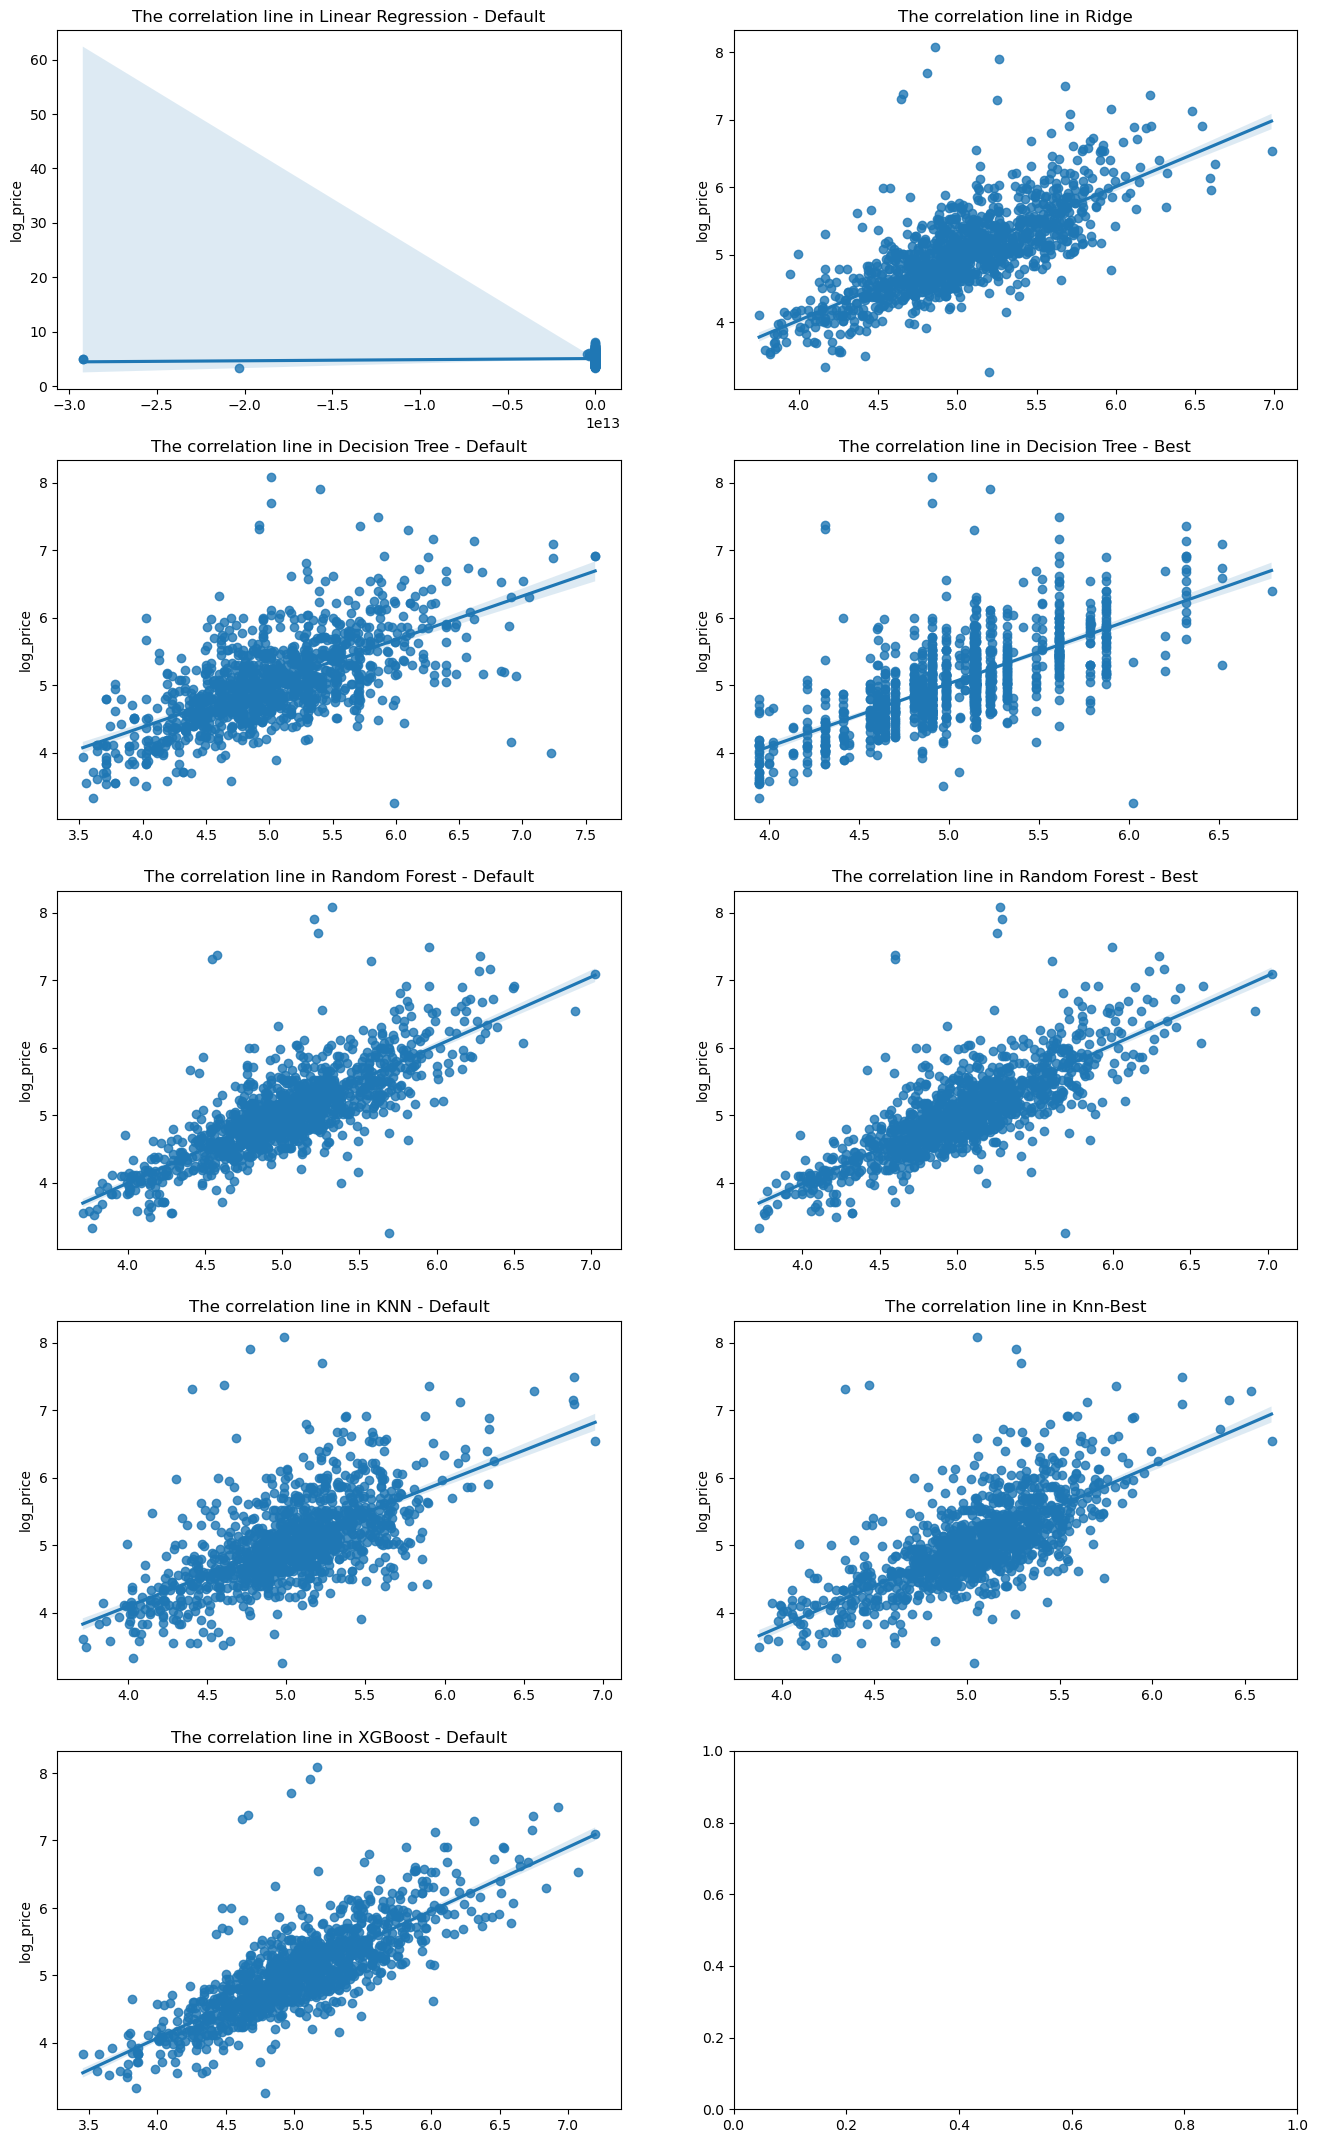

In [113]:
# Add the predictions from XGBoost with default parameters to the prediction_dictionaries dictionary
prediction_dictionaries['XGBoost - Default'] = xgb_prediction
plot_all_r2()


#### <a id='toc3_3_5_2_'></a>[2.2.4.2 After Hyperparameter](#toc0_)

In [114]:
# Finding the best parameters
param_grid = {
    'max_depth': [2, 3, 4],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [250, 300, 350],
    'subsample': [0.6, 0.8, 1.0]
}

# Create GridSearchCV object for XGBoost with specified parameters
#grid_xgb = GridSearchCV(XGBRegressor(), param_grid, refit=True, verbose=10, cv=5, scoring="neg_mean_squared_error")

# Fit the grid search object to the data
#grid_xgb.fit(X, y)

#print(f"Best parameters are {grid_xgb.best_params_}")
#print("Best score is {}".format(grid_xgb.best_score_ * -1))
#print("Best model is {}".format(grid_xgb.best_estimator_))

In [115]:
#Create a new XGBoost using the best hyperparameters found.
best_params = {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}

In [116]:
# Has to be repeated for some reason an error was being displayed
import xgboost as xgb

In [117]:
# Create an XGBoost model with the best parameters found during grid search and a random state of 23
xgb_best = xgb.XGBRegressor(**best_params, random_state=23)

# Fit the XGBoost model with the best parameters to the training data
xgb_best.fit(X_train, y_train)

# Make predictions using the XGBoost model with the best parameters on the test data
xgb_best_prediction = xgb_best.predict(X_test)

# Calculate the MSE, MAE, RMSE, and R2 score for the XGBoost model with the best parameters
xgb_best_mse = metrics.mean_squared_error(y_test, xgb_best_prediction)
xgb_best_mae = metrics.mean_absolute_error(y_test, xgb_best_prediction)
xgb_best_rmse = np.sqrt(xgb_best_mse)
xgb_best_r2 = metrics.r2_score(y_test, xgb_best_prediction)

print("Mean Squared Error: {}".format(xgb_best_mse))
print("Mean Absolute Error: {}".format(xgb_best_mae))
print("Root Mean Absolute Error: {}".format(xgb_best_rmse))
print("R2 score: {}".format(xgb_best_r2))


Mean Squared Error: 0.14535524964514135
Mean Absolute Error: 0.2620985084206543
Root Mean Absolute Error: 0.3812548355695195
R2 score: 0.6364024774048778


In [118]:
# Add the predictions from XGBoost with best parameters to the prediction_list dictionary
prediction_list['XGBoost - Best'] = np.array(xgb_best_prediction[:20])
prediction_list

Linear Regression - Default  Ridge  Decision Tree - Default  \
Actual Values                                                                
5.48                                  5.27   5.27                     4.97   
5.41                                  5.30   5.30                     5.71   
4.88                                  4.71   4.69                     4.38   
5.98                                  5.16   5.13                     4.54   
4.51                                  4.55   4.56                     4.39   
5.63                                  5.80   5.79                     6.40   
4.01                                  4.14   4.16                     4.29   
5.18                                  5.05   5.07                     5.49   
4.95                                  5.03   5.04                     4.80   
5.50                                  5.45   5.45                     5.04   
3.58                                  4.24   4.25                     4.70   
5.86                                  5.27   5.25                     5.20   
4.79                                  4.99   4.99                     4.55   
5.30                                  5.08   5.09                     5.64   
5.44                                  4.90   4.90                     5.30   
5.61                                  4.89   4.89                     4.91   
4.98                                  5.27   5.27                     4.88   
5.51                                  5.55   5.54                     5.54   
5.67                                  4.45   4.45                     4.03   
5.76                                  5.55   5.54                     4.95   

               Decision Tree - Best  Random Forest - Default  \
Actual Values                                                  
5.48                           5.15                     5.14   
5.41                           5.32                     5.29   
4.88                           4.31                     4.58   
5.98                           4.64                     4.98   
4.51                           4.90                     4.59   
5.63                           5.87                     6.08   
4.01                           4.56                     4.22   
5.18                           5.14                     5.04   
4.95                           5.32                     5.18   
5.50                           5.32                     5.33   
3.58                           3.94                     4.13   
5.86                           5.14                     5.14   
4.79                           4.90                     4.77   
5.30                           4.98                     5.64   
5.44                           4.90                     5.32   
5.61                           4.90                     4.77   
4.98                           5.15                     5.21   
5.51                           5.61                     5.62   
5.67                           4.60                     4.40   
5.76                           5.32                     5.35   

               Random Forest - Best  KNN - Default  KNN-Best  \
Actual Values                                                  
5.48                           5.17           5.37      5.42   
5.41                           5.35           5.41      5.28   
4.88                           4.60           5.19      4.69   
5.98                           5.01           4.30      5.02   
4.51                           4.56           4.55      4.46   
5.63                           6.10           4.81      5.17   
4.01                           4.25           4.14      4.13   
5.18                           5.05           5.14      5.09   
4.95                           5.23           5.21      5.22   
5.50                           5.34           5.13      5.33   
3.58                           4.11           4.64      4.83   
5.86                           5.14           5.12      5

In [119]:
# Add the MSE and R2 score for XGBoost with best parameters to the error_list dictionary
error_list['XGBoost - Best'] = ["{:.2f}".format(xgb_best_mse), "{:.2f}".format(xgb_best_r2)]
error_list.T

Mean Squared Error  \
Linear Regression - Default  1785025989282812234039296.00   
Ridge                                                0.18   
Decision Tree - Default                              0.29   
Decision Tree - Best                                 0.21   
Random Forest - Default                              0.16   
Random Forest - Best                                 0.15   
KNN - Default                1785025989282812234039296.00   
KNN-Best                                             0.21   
XGBoost - Default                                    0.15   
XGBoost - Best                                       0.15   

                                                  R2 Score  
Linear Regression - Default  -4465136478081320971403264.00  
Ridge                                                 0.56  
Decision Tree - Default                               0.28  
Decision Tree - Best                                  0.46  
Random Forest - Default                               0.61  
Random Forest - Best                                  0.61  
KNN - Default                -4465136478081320971403264.00  
KNN-Best                                              0.48  
XGBoost - Default                                     0.62  
XGBoost - Best                                        0.64

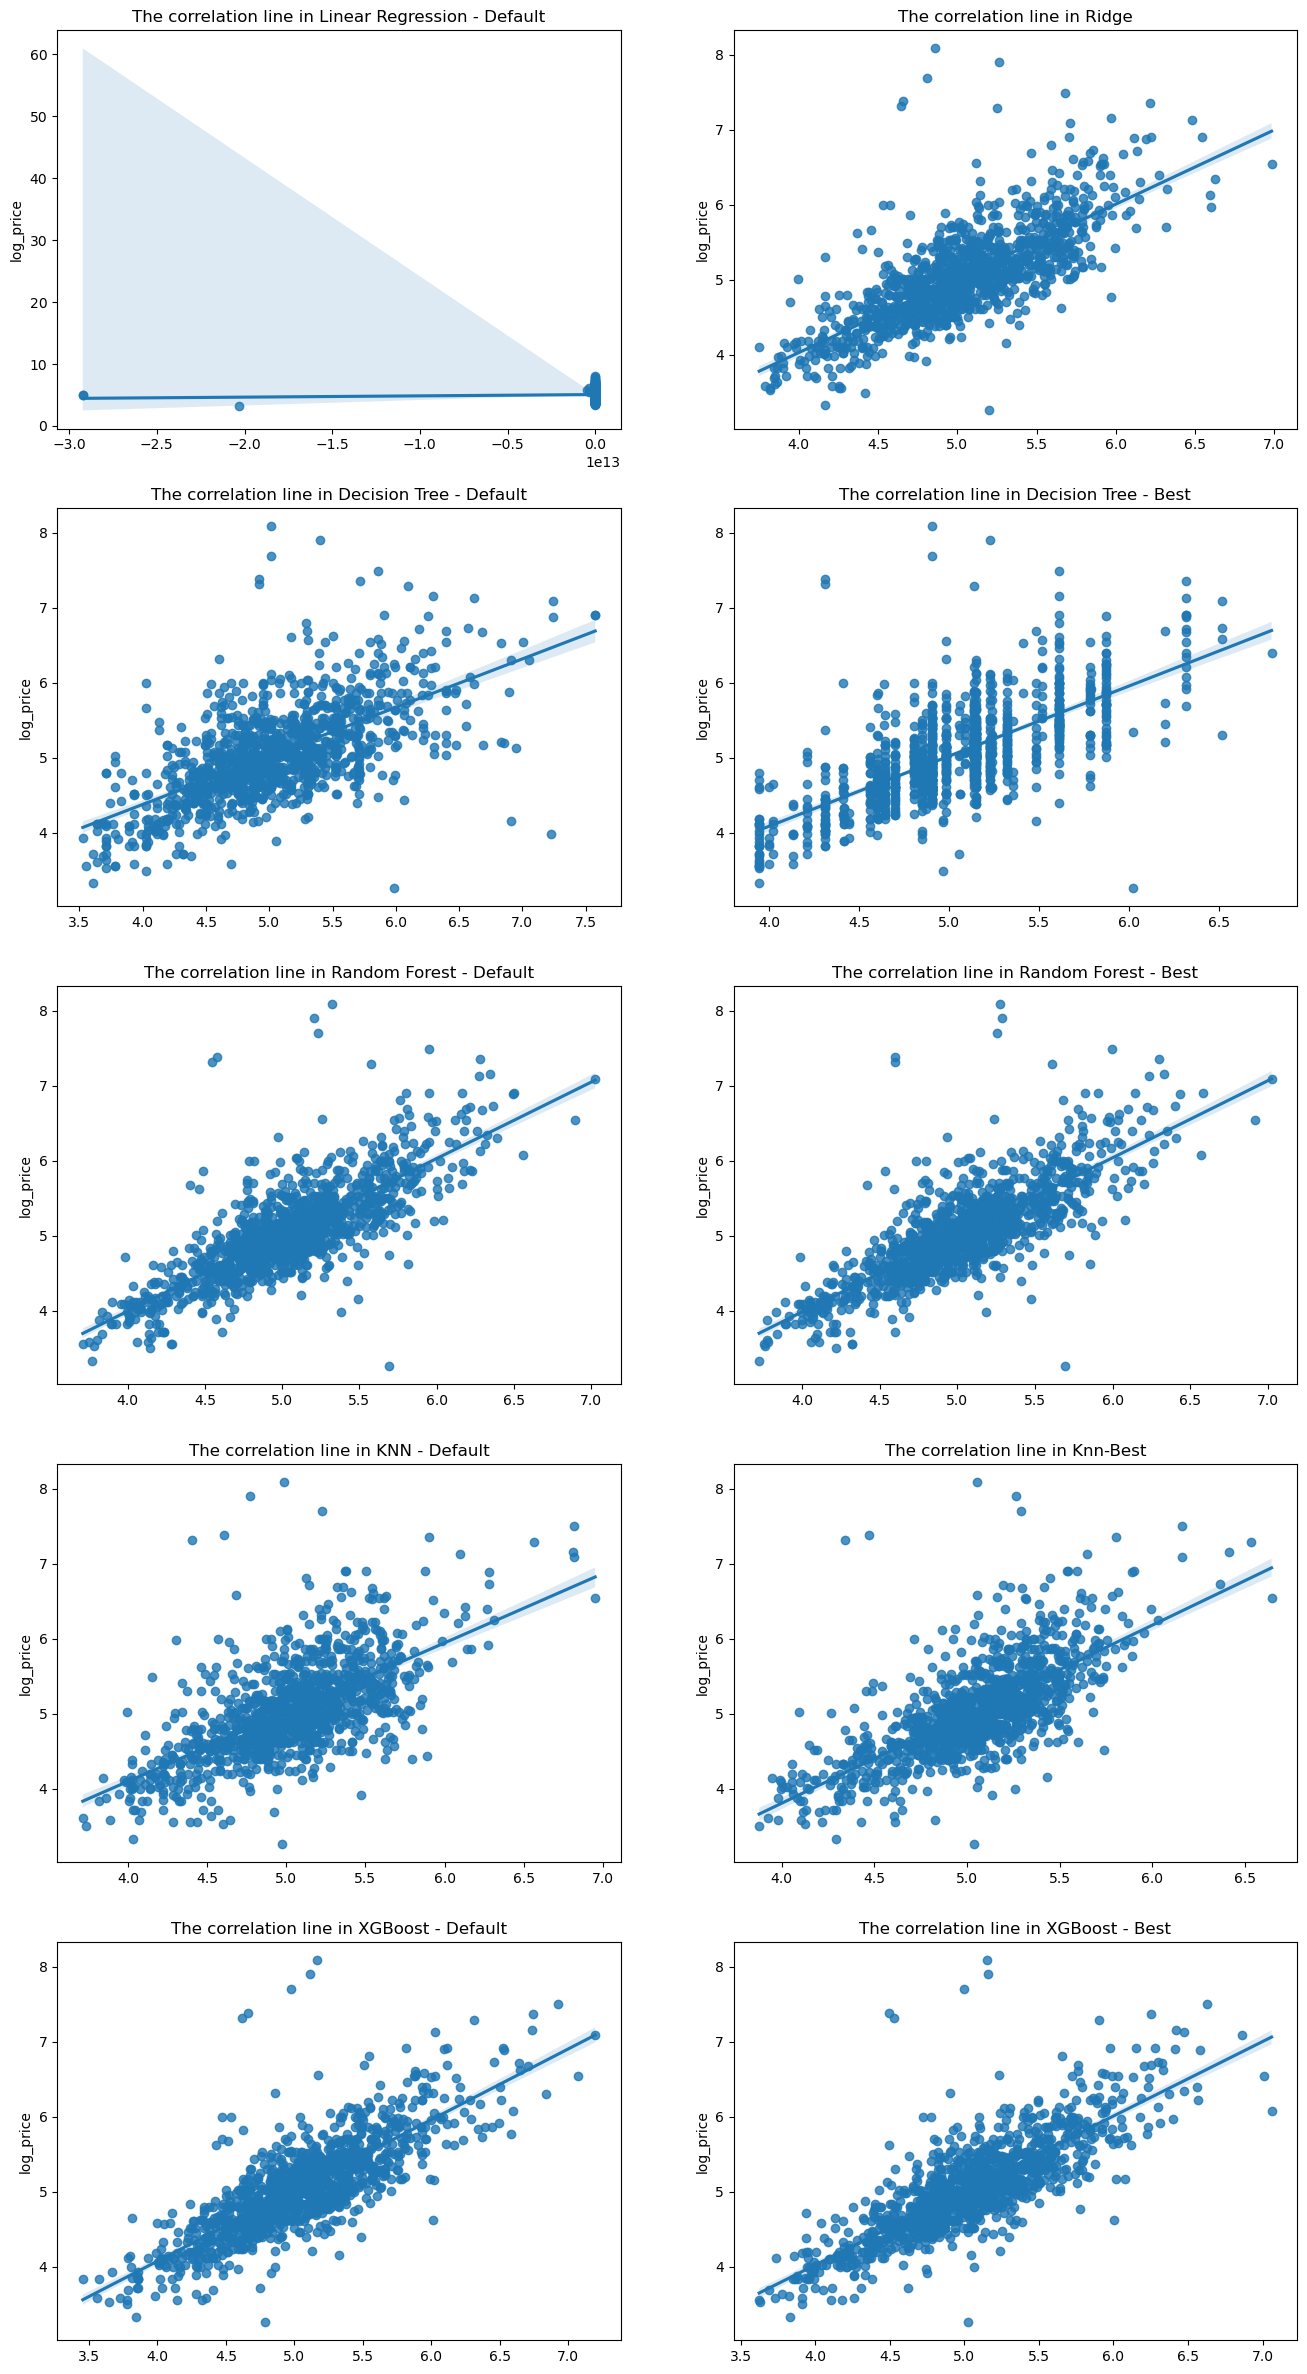

In [120]:
# Add the predictions from XGBoost with best parameters to the prediction_dictionaries dictionary
prediction_dictionaries['XGBoost - Best'] = xgb_best_prediction
plot_all_r2()


# <a id='toc4_'></a>[4. Model Comparison and Key Findings](#toc0_)

Exporting Prediction Accuracy among models to an image

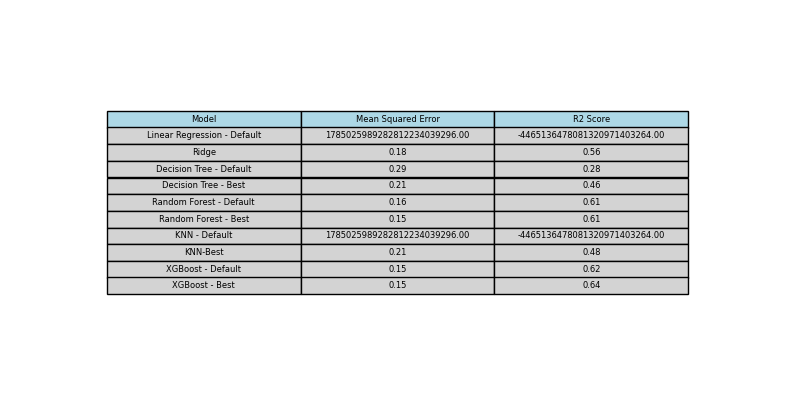

In [122]:
# Convert the 'error_list' to its transpose
error_comparison = error_list.T

# Reset the index and convert it to a regular column
error_comparison.reset_index(inplace=True)

# Rename the 'index' column to 'Model'
error_comparison.rename(columns={'index': 'Model'}, inplace=True)

# Drop the additional 'models' column
error_comparison.drop(columns='models', inplace=True, errors='ignore')

# Create a table-like visualization using Matplotlib
plt.figure(figsize=(10, 5))
plt.axis('off')  # Hide the axis to make it look like a table
plt.table(cellText=error_comparison.values,
          colLabels=error_comparison.columns,
          cellLoc='center',
          loc='center',
          colColours=['lightblue']*len(error_comparison.columns),
          cellColours=[['lightgray']*len(error_comparison.columns)]*len(error_comparison),
          colWidths=[0.25] * len(error_comparison.columns))

# Save the table visualization as an image
plt.savefig('images/error_comparison_table.png')

##### <a id='toc4_1_1_1_1_'></a>[1) Model Comparison](#toc0_)
The table shows the performance of various machine learning models on a regression task. The models are evaluated based on two metrics: mean squared error (MSE) and R-squared (R^2). Here's how to interpret the table:

- Linear Regression - Default: The linear regression model with default hyperparameters achieved an extremely high MSE value of 8.793191414347403e+24 and a negative R^2 value of -2.1995645989854235e+25. This indicates that the default linear regression model performed very poorly on the task.

- Ridge: The Ridge regression model achieved an MSE of 0.18 and an R^2 of 0.56. These values suggest that the Ridge model performed relatively better than the default linear regression model, with a lower MSE and a positive R^2 indicating a better fit to the data.

- Decision Tree - Default: The decision tree model with default hyperparameters achieved an MSE of 0.29 and an R^2 of 0.28. These values suggest that the default decision tree model had a higher MSE and a lower R^2 compared to the Ridge regression model, indicating a poorer fit to the data.

- Decision Tree - Best: The decision tree model with tuned hyperparameters achieved an improved MSE of 0.21 and an R^2 of 0.47 compared to the default decision tree model. This suggests that hyperparameter tuning improved the performance of the decision tree model, resulting in a lower MSE and a higher R^2.

- Random Forest - Default: The random forest model with default hyperparameters achieved an MSE of 0.16 and an R^2 of 0.61. These values indicate that the default random forest model performed better than both the default decision tree and Ridge regression models, with a lower MSE and a higher R^2.

- Random Forest - Best: The random forest model with tuned hyperparameters achieved the same MSE of 0.16 as the default model but a slightly higher R^2 of 0.61. This suggests that hyperparameter tuning did not significantly impact the performance of the random forest model.

- KNN-Best: The K-nearest neighbors (KNN) model with tuned hyperparameters achieved an MSE of 0.21 and an R^2 of 0.48. These values indicate that the tuned KNN model performed similarly to the tuned decision tree model, with a lower MSE and a slightly higher R^2 compared to the default decision tree model.

- XGBoost - Default: The XGBoost model with default hyperparameters achieved an MSE of 0.15 and an R^2 of 0.62. These values indicate that the default XGBoost model performed better than all the other models evaluated so far, with the lowest MSE and the highest R^2.

- XGBoost - Best: The XGBoost model with tuned hyperparameters achieved a slightly higher MSE of 0.15 but a higher R^2 of 0.64 compared to the default XGBoost model. This suggests that hyperparameter tuning improved the performance of the XGBoost model, resulting in a higher R^2.

In summary, the XGBoost model (both default and tuned) had the best performance among the models evaluated, with the lowest MSE and the highest R^2. The Ridge regression model also performed relatively well, outperforming the default linear regression and decision tree models. The decision tree model showed improvement with hyperparameter tuning, and the random forest and KNN models had similar performance to the tuned decision tree model.


##### <a id='toc4_1_1_1_2_'></a>[2) Use of hyperparameters](#toc0_)
Based on the results provided, the use of hyperparameter tuning appears to have had a noticeable impact on the performance of some of the models.

The decision tree model demonstrated improved performance when hyperparameters were tuned, as indicated by the decrease in MSE and the increase in R^2 compared to the default configuration. This suggests that carefully selecting the right hyperparameters can help optimize the decision tree model for the given regression task.

In contrast, the random forest model did not show significant improvement with hyperparameter tuning. The MSE and R^2 values remained the same for both the default and tuned configurations. This indicates that the default hyperparameters already provided a reasonably good fit to the data, and further tuning did not lead to substantial performance gains in this case.

Finally while the XGBoost model showed the best performance among all the models evaluated, it is worth noting that the improvement achieved through hyperparameter tuning was relatively minor in this case.

Overall, these results highlight the importance of hyperparameter tuning in machine learning. While it can lead to improved model performance in some cases, it may not always yield substantial gains. It is crucial to carefully evaluate the impact of hyperparameter tuning on a specific task and select the approach accordingly. Additionally, considering the computational cost of hyperparameter tuning, it is essential to strike a balance between the potential performance improvements and the associated time and resource requirements.

##### <a id='toc4_1_1_1_3_'></a>[3) Accuracy comment](#toc0_)
Around 60% to predict the price of an Airbnb is not great. The main issue of the model is that it's trying to predict two different type of properties, Entire home/apt and Private room, at the same time. In addition, a large majority of the rental is located in Downtown, which also has higher price than other neighbourhood. Finally the dataset is relatively small, in the absence of historical data impacted the capacity for the model to perform better.


In [123]:
# Prediction value
prediction_list

Linear Regression - Default  Ridge  Decision Tree - Default  \
Actual Values                                                                
5.48                                  5.27   5.27                     4.97   
5.41                                  5.30   5.30                     5.71   
4.88                                  4.71   4.69                     4.38   
5.98                                  5.16   5.13                     4.54   
4.51                                  4.55   4.56                     4.39   
5.63                                  5.80   5.79                     6.40   
4.01                                  4.14   4.16                     4.29   
5.18                                  5.05   5.07                     5.49   
4.95                                  5.03   5.04                     4.80   
5.50                                  5.45   5.45                     5.04   
3.58                                  4.24   4.25                     4.70   
5.86                                  5.27   5.25                     5.20   
4.79                                  4.99   4.99                     4.55   
5.30                                  5.08   5.09                     5.64   
5.44                                  4.90   4.90                     5.30   
5.61                                  4.89   4.89                     4.91   
4.98                                  5.27   5.27                     4.88   
5.51                                  5.55   5.54                     5.54   
5.67                                  4.45   4.45                     4.03   
5.76                                  5.55   5.54                     4.95   

               Decision Tree - Best  Random Forest - Default  \
Actual Values                                                  
5.48                           5.15                     5.14   
5.41                           5.32                     5.29   
4.88                           4.31                     4.58   
5.98                           4.64                     4.98   
4.51                           4.90                     4.59   
5.63                           5.87                     6.08   
4.01                           4.56                     4.22   
5.18                           5.14                     5.04   
4.95                           5.32                     5.18   
5.50                           5.32                     5.33   
3.58                           3.94                     4.13   
5.86                           5.14                     5.14   
4.79                           4.90                     4.77   
5.30                           4.98                     5.64   
5.44                           4.90                     5.32   
5.61                           4.90                     4.77   
4.98                           5.15                     5.21   
5.51                           5.61                     5.62   
5.67                           4.60                     4.40   
5.76                           5.32                     5.35   

               Random Forest - Best  KNN - Default  KNN-Best  \
Actual Values                                                  
5.48                           5.17           5.37      5.42   
5.41                           5.35           5.41      5.28   
4.88                           4.60           5.19      4.69   
5.98                           5.01           4.30      5.02   
4.51                           4.56           4.55      4.46   
5.63                           6.10           4.81      5.17   
4.01                           4.25           4.14      4.13   
5.18                           5.05           5.14      5.09   
4.95                           5.23           5.21      5.22   
5.50                           5.34           5.13      5.33   
3.58                           4.11           4.64      4.83   
5.86                           5.14           5.12      5

The above dashboard illustrate on 20 log prices of Airbnb, how the differents models performs vs the actual price. It's a different way to illustrate the insight given in the previous point

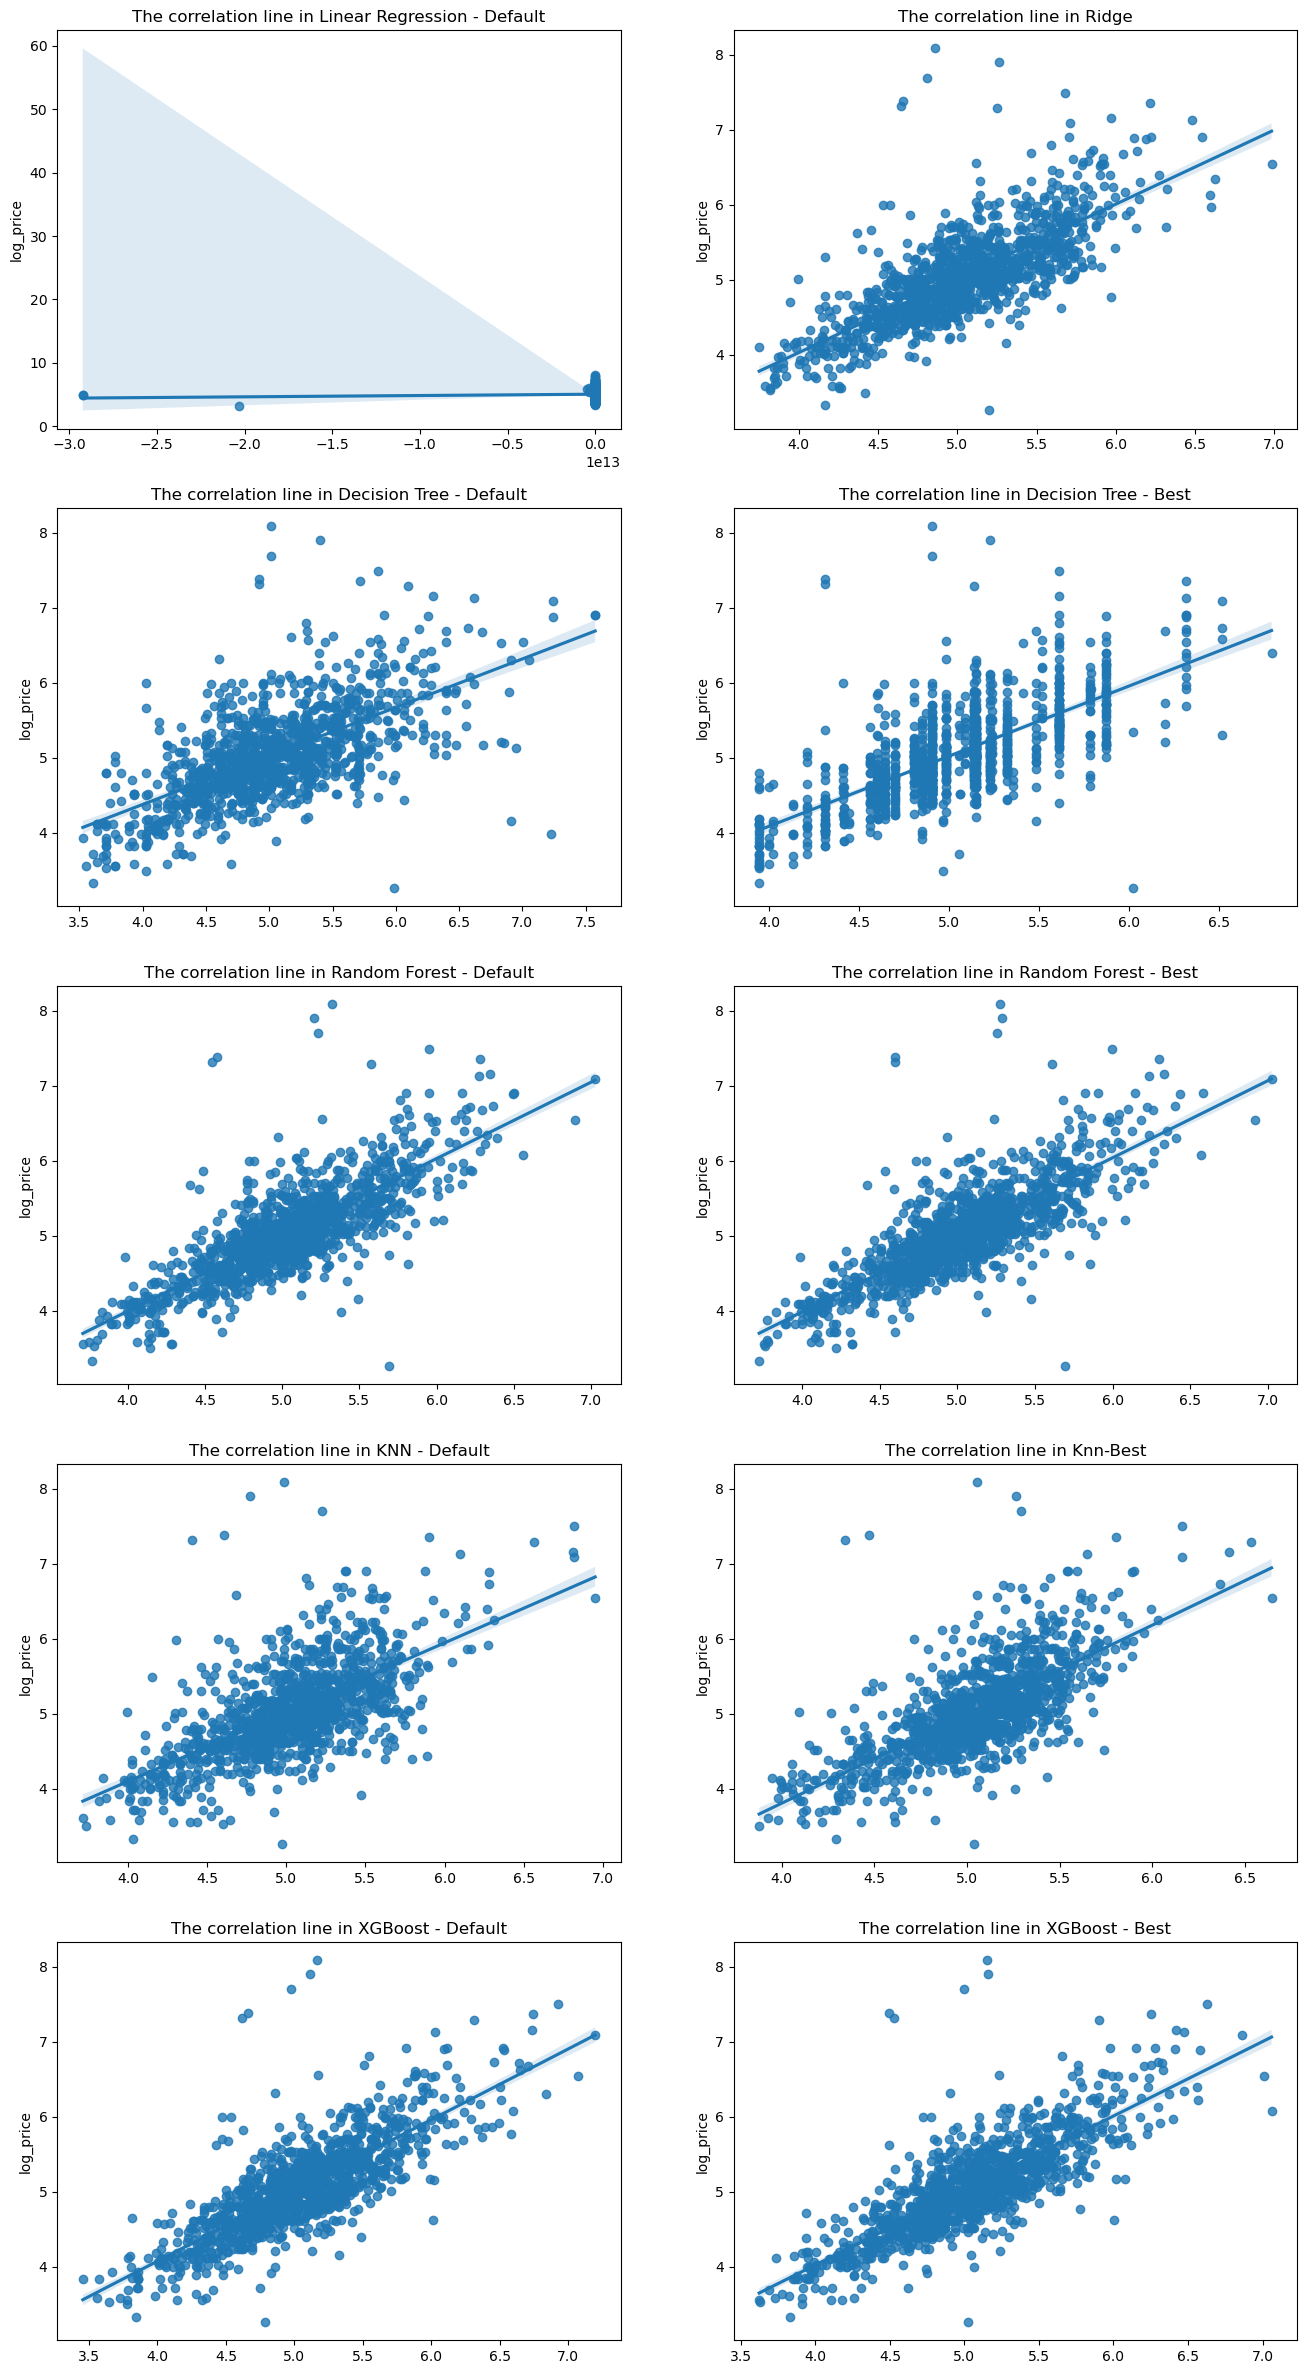

In [124]:
plot_all_r2()

The comparison of subplots can be used to determine the relative performance of different models. Here are some factors to consider when evaluating the subplots and identifying better and worse outputs.

- Alignment of Points around the Line: A better output would exhibit a tighter alignment of the data points around the correlation line. This indicates that the predicted values are closer to the actual values, resulting in a smaller prediction error. Subplots with data points scattered closely around the line can be considered more accurate.

- Variability and Spread of Points: The variability and spread of data points around the correlation line should be considered. A better output would show less scatter and less spread of points, indicating that the predicted values are consistently close to the actual values. Subplots with data points concentrated closely around the line suggest more reliable predictions.

- Outliers and Residuals: It's essential to check for outliers or data points that deviate significantly from the correlation line. Better outputs would have fewer outliers or residuals, indicating more accurate predictions overall. Subplots with minimal or no extreme data points can be considered better.

It's quite easy to visualize a 'confidence interval' surrounding the regression linear for XGBoost (both), the Ridge and the Random Forest. However, the interval sizes varies between those 3 models. The size of the interval is directly dependant on the r2 and mse of each model.

